# Feature Engineering & ML Model Building
## Predicting District-Level Child Malnutrition

**Objectives:**
1. Load the processed district-level dataset
2. Perform feature correlation analysis
3. Engineer additional features if needed
4. Split data into train/test sets
5. Build and train multiple ML models
6. Compare model performance

**Models to build:**
- Linear Regression (baseline)
- Random Forest
- XGBoost
- Neural Network

## 1. Import Libraries & Load Data

In [27]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Settings
pd.set_option('display.max_columns', 50)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Set random seed for reproducibility
np.random.seed(42)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [28]:
# Load the enhanced district dataset
data_path = '../Data/Processed/district_malnutrition_enhanced.csv'
df = pd.read_csv(data_path)

print(f"✅ Data loaded successfully!")
print(f"\n📊 Dataset shape: {df.shape}")
print(f"   Districts: {df.shape[0]}")
print(f"   Features: {df.shape[1]}")

print("\n📋 First 5 rows:")
df.head()

✅ Data loaded successfully!

📊 Dataset shape: (707, 23)
   Districts: 707
   Features: 23

📋 First 5 rows:


,district,wealth_index,mother_edu_level,mother_age,mother_edu_years,mother_bmi,mother_works,female_headed_hh,child_age_months,child_sex,birth_interval,birth_weight,breastfeed_duration,currently_breastfeed,bcg_vaccination,dpt_vaccination,measles_vaccination,knows_ors,stunting_rate,wasting_rate,underweight_rate,state,sample_size
0,1,2.928793,1.628483,30.297214,7.873065,2429.767296,0.122449,1.027864,28.338658,1.495356,1.980831,747.157895,71.478261,3485.684211,1.010753,0.967742,1.268817,NaN,23.219814,21.671827,25.077399,1,300
1,2,3.332168,1.531469,30.569930,7.496503,2394.293286,0.266667,1.027972,32.459075,1.437063,2.265018,699.160839,77.533865,3532.377622,1.034247,0.945205,1.335616,NaN,24.475524,16.783217,20.279720,1,267
2,3,3.461240,1.686047,32.410853,8.100775,2410.129412,0.428571,1.108527,29.211155,1.480620,2.051793,689.705426,73.362140,3256.170543,1.048951,0.951049,1.573427,NaN,21.317829,14.341085,17.441860,37,229
3,4,2.387454,1.612546,30.428044,7.845018,2469.605166,0.200000,1.033210,30.011364,1.568266,2.135849,574.446494,76.290456,3429.269373,1.114865,1.006757,1.425676,NaN,33.948339,16.236162,21.033210,37,253
4,5,2.955844,1.594805,29.407792,7.641558,2317.942408,0.266667,1.057143,31.289189,1.529870,2.239892,647.974026,70.291139,3688.379221,1.067358,0.994819,1.367876,NaN,24.415584,14.805195,18.181818,1,361


## 2. Data Preparation

In [29]:
# Check for missing values
print("🔍 Checking for missing values...\n")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Percentage': missing_pct
})

print(missing_df[missing_df['Missing_Count'] > 0])

if missing_df['Missing_Count'].sum() == 0:
    print("✅ No missing values found!")
else:
    print("\n⚠️ Found missing values - will handle them")

🔍 Checking for missing values...

           Missing_Count  Percentage
knows_ors            707       100.0

⚠️ Found missing values - will handle them


In [30]:
# Drop columns with all missing values (like knows_ors)
df = df.dropna(axis=1, how='all')

print(f"✅ Dropped columns with all missing values")
print(f"   Remaining features: {df.shape[1]}")
print(f"\n📋 Columns in dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i:2}. {col}")

✅ Dropped columns with all missing values
   Remaining features: 22

📋 Columns in dataset:
    1. district
    2. wealth_index
    3. mother_edu_level
    4. mother_age
    5. mother_edu_years
    6. mother_bmi
    7. mother_works
    8. female_headed_hh
    9. child_age_months
   10. child_sex
   11. birth_interval
   12. birth_weight
   13. breastfeed_duration
   14. currently_breastfeed
   15. bcg_vaccination
   16. dpt_vaccination
   17. measles_vaccination
   18. stunting_rate
   19. wasting_rate
   20. underweight_rate
   21. state
   22. sample_size


## 3. Exploratory Data Analysis - Correlations

In [31]:
# Define target variables and features
target_vars = ['stunting_rate', 'wasting_rate', 'underweight_rate']
id_vars = ['district', 'state', 'sample_size']

# Get feature columns (exclude targets and IDs)
feature_cols = [col for col in df.columns if col not in target_vars + id_vars]

print(f"📊 Analysis Setup:")
print(f"   Target variables: {len(target_vars)} - {target_vars}")
print(f"   Feature variables: {len(feature_cols)}")
print(f"\n📋 Features to use for prediction:")
for i, feat in enumerate(feature_cols, 1):
    print(f"   {i:2}. {feat}")

📊 Analysis Setup:
   Target variables: 3 - ['stunting_rate', 'wasting_rate', 'underweight_rate']
   Feature variables: 16

📋 Features to use for prediction:
    1. wealth_index
    2. mother_edu_level
    3. mother_age
    4. mother_edu_years
    5. mother_bmi
    6. mother_works
    7. female_headed_hh
    8. child_age_months
    9. child_sex
   10. birth_interval
   11. birth_weight
   12. breastfeed_duration
   13. currently_breastfeed
   14. bcg_vaccination
   15. dpt_vaccination
   16. measles_vaccination


NameError: name 'correlations' is not defined

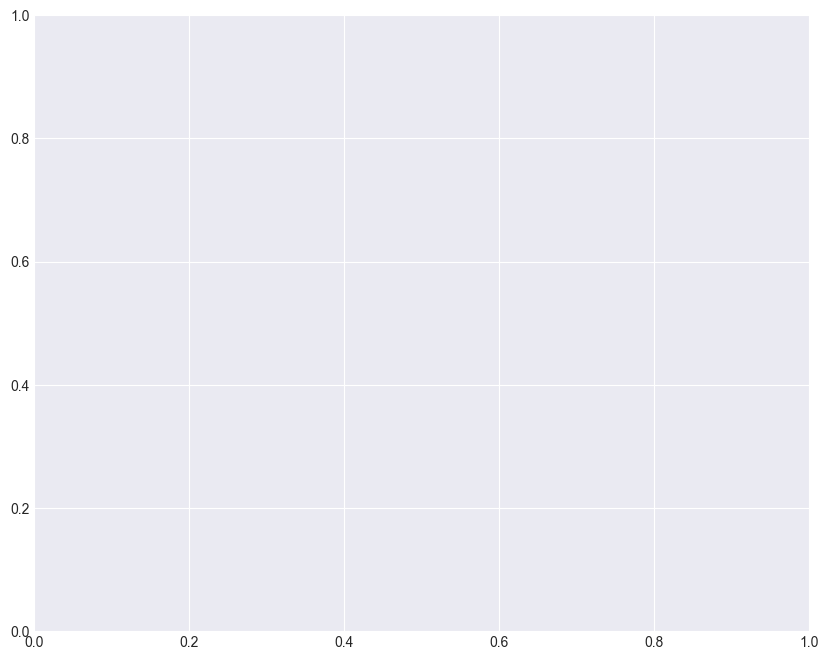

In [32]:
# Visualize top correlations with stunting
fig, ax = plt.subplots(figsize=(10, 8))

# Get top 10 absolute correlations
top_corr = correlations.abs().nlargest(10)
top_features = correlations[top_corr.index]

# Create bar plot
colors = ['red' if x > 0 else 'green' for x in top_features]
top_features.plot(kind='barh', ax=ax, color=colors, edgecolor='black')

ax.set_xlabel('Correlation with Stunting Rate', fontsize=12)
ax.set_ylabel('Features', fontsize=12)
ax.set_title('Top 10 Features Correlated with Stunting Rate', fontsize=14, fontweight='bold')
ax.axvline(0, color='black', linewidth=0.8)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Red bars = Positive correlation (bad for nutrition)")
print("✅ Green bars = Negative correlation (good for nutrition)")

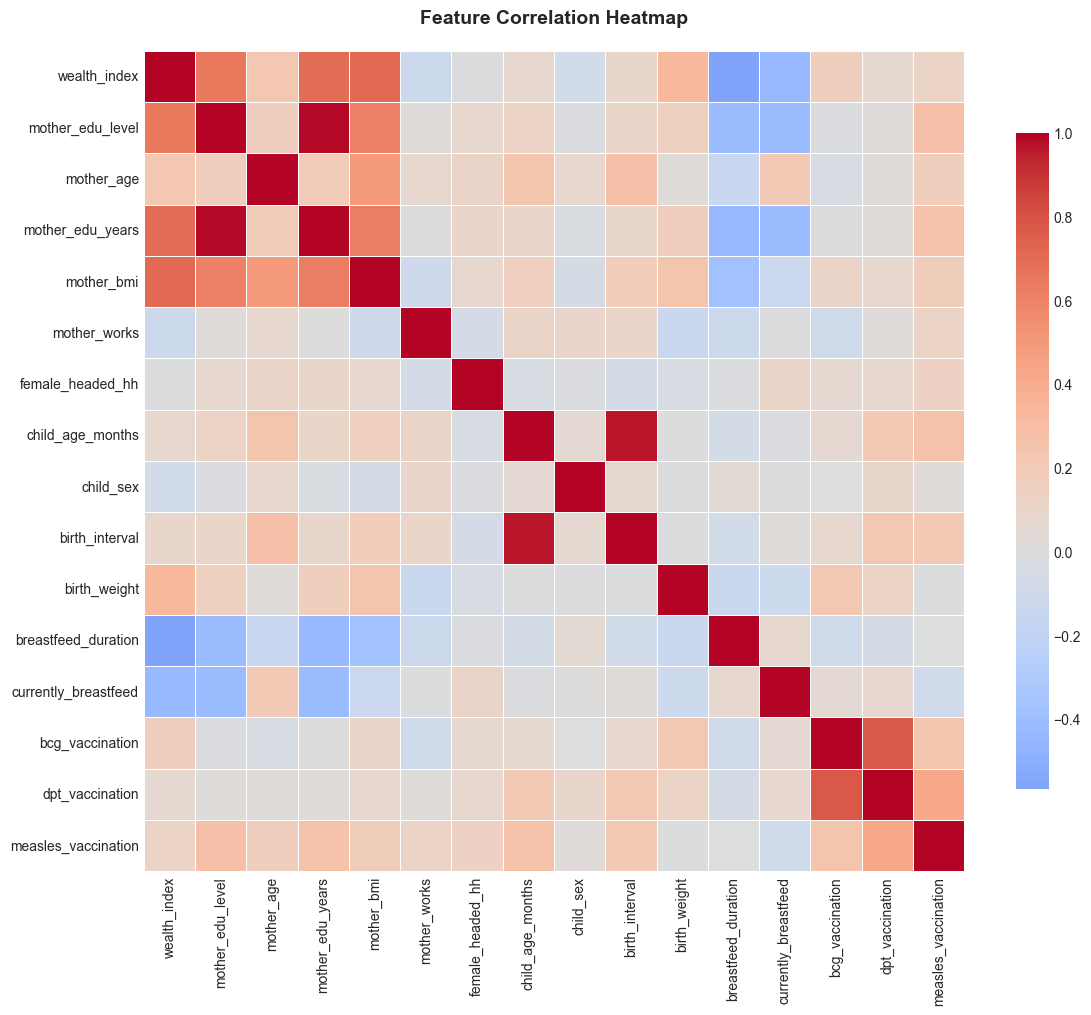


✅ Heatmap shows relationships between all features
   (Red = positive correlation, Blue = negative correlation)


In [33]:
# Correlation heatmap of all features
plt.figure(figsize=(12, 10))

# Select numeric features only
numeric_features = df[feature_cols].select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_features].corr()

# Create heatmap
sns.heatmap(corr_matrix, 
            cmap='coolwarm', 
            center=0,
            annot=False,
            fmt='.2f',
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})

plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n✅ Heatmap shows relationships between all features")
print("   (Red = positive correlation, Blue = negative correlation)")

## 4. Prepare Data for Machine Learning

In [34]:
# Prepare features and target for STUNTING prediction
print("🎯 Preparing data for ML models (Target: Stunting Rate)\n")

# Features (X) and Target (y)
X = df[feature_cols].copy()
y_stunting = df['stunting_rate'].copy()
y_wasting = df['wasting_rate'].copy()
y_underweight = df['underweight_rate'].copy()

print(f"Features (X) shape: {X.shape}")
print(f"Target stunting (y) shape: {y_stunting.shape}")
print(f"Target wasting (y) shape: {y_wasting.shape}")
print(f"Target underweight (y) shape: {y_underweight.shape}")

# Split data: 80% train, 20% test
X_train, X_test, y_train_stunt, y_test_stunt = train_test_split(
    X, y_stunting, test_size=0.2, random_state=42
)

print(f"\n✅ Train-Test Split Complete:")
print(f"   Training set: {X_train.shape[0]} districts ({X_train.shape[0]/len(X)*100:.0f}%)")
print(f"   Test set: {X_test.shape[0]} districts ({X_test.shape[0]/len(X)*100:.0f}%)")

🎯 Preparing data for ML models (Target: Stunting Rate)

Features (X) shape: (707, 16)
Target stunting (y) shape: (707,)
Target wasting (y) shape: (707,)
Target underweight (y) shape: (707,)

✅ Train-Test Split Complete:
   Training set: 565 districts (80%)
   Test set: 142 districts (20%)


In [35]:
# Feature scaling (important for Neural Networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Feature scaling complete (StandardScaler)")
print(f"   Mean after scaling: {X_train_scaled.mean():.6f}")
print(f"   Std after scaling: {X_train_scaled.std():.6f}")

✅ Feature scaling complete (StandardScaler)
   Mean after scaling: 0.000000
   Std after scaling: 1.000000


## 5. Build Machine Learning Models

We'll build and compare multiple models:
1. **Linear Regression** - Baseline model
2. **Random Forest** - Ensemble tree-based model
3. **XGBoost** - Advanced gradient boosting

We'll evaluate using:
- **R² Score** (higher is better, max 1.0)
- **RMSE** (lower is better)
- **MAE** (lower is better)

### Model 1: Linear Regression (Baseline)

In [36]:
print("🤖 MODEL 1: Linear Regression\n")
print("="*60)

# Train model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train_stunt)

# Make predictions
y_pred_train_lr = lr_model.predict(X_train_scaled)
y_pred_test_lr = lr_model.predict(X_test_scaled)

# Evaluate
train_r2_lr = r2_score(y_train_stunt, y_pred_train_lr)
test_r2_lr = r2_score(y_test_stunt, y_pred_test_lr)
test_rmse_lr = np.sqrt(mean_squared_error(y_test_stunt, y_pred_test_lr))
test_mae_lr = mean_absolute_error(y_test_stunt, y_pred_test_lr)

print(f"Training R² Score: {train_r2_lr:.4f}")
print(f"Test R² Score: {test_r2_lr:.4f}")
print(f"Test RMSE: {test_rmse_lr:.4f}%")
print(f"Test MAE: {test_mae_lr:.4f}%")

print("\n✅ Linear Regression trained successfully!")
print("="*60)

🤖 MODEL 1: Linear Regression

Training R² Score: 0.5136
Test R² Score: 0.4363
Test RMSE: 5.7333%
Test MAE: 4.4478%

✅ Linear Regression trained successfully!


### Model 2: Random Forest

In [37]:
print("🌲 MODEL 2: Random Forest\n")
print("="*60)

# Train model
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

print("Training Random Forest... (this may take a minute)")
rf_model.fit(X_train, y_train_stunt)

# Make predictions
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

# Evaluate
train_r2_rf = r2_score(y_train_stunt, y_pred_train_rf)
test_r2_rf = r2_score(y_test_stunt, y_pred_test_rf)
test_rmse_rf = np.sqrt(mean_squared_error(y_test_stunt, y_pred_test_rf))
test_mae_rf = mean_absolute_error(y_test_stunt, y_pred_test_rf)

print(f"\nTraining R² Score: {train_r2_rf:.4f}")
print(f"Test R² Score: {test_r2_rf:.4f}")
print(f"Test RMSE: {test_rmse_rf:.4f}%")
print(f"Test MAE: {test_mae_rf:.4f}%")

print("\n✅ Random Forest trained successfully!")
print("="*60)

🌲 MODEL 2: Random Forest

Training Random Forest... (this may take a minute)

Training R² Score: 0.9014
Test R² Score: 0.4970
Test RMSE: 5.4157%
Test MAE: 4.1456%

✅ Random Forest trained successfully!


### Model 3: XGBoost

In [38]:
# Install XGBoost if not already installed
try:
    import xgboost as xgb
    print("✅ XGBoost already installed")
except ImportError:
    print("Installing XGBoost...")
    import sys
    !{sys.executable} -m pip install xgboost
    import xgboost as xgb
    print("✅ XGBoost installed successfully")

✅ XGBoost already installed


In [39]:
print("🚀 MODEL 3: XGBoost\n")
print("="*60)

# Train model
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)

print("Training XGBoost... (this may take a minute)")
xgb_model.fit(X_train, y_train_stunt)

# Make predictions
y_pred_train_xgb = xgb_model.predict(X_train)
y_pred_test_xgb = xgb_model.predict(X_test)

# Evaluate
train_r2_xgb = r2_score(y_train_stunt, y_pred_train_xgb)
test_r2_xgb = r2_score(y_test_stunt, y_pred_test_xgb)
test_rmse_xgb = np.sqrt(mean_squared_error(y_test_stunt, y_pred_test_xgb))
test_mae_xgb = mean_absolute_error(y_test_stunt, y_pred_test_xgb)

print(f"\nTraining R² Score: {train_r2_xgb:.4f}")
print(f"Test R² Score: {test_r2_xgb:.4f}")
print(f"Test RMSE: {test_rmse_xgb:.4f}%")
print(f"Test MAE: {test_mae_xgb:.4f}%")

print("\n✅ XGBoost trained successfully!")
print("="*60)

🚀 MODEL 3: XGBoost

Training XGBoost... (this may take a minute)

Training R² Score: 0.9700
Test R² Score: 0.4306
Test RMSE: 5.7619%
Test MAE: 4.4261%

✅ XGBoost trained successfully!


## 6. Model Comparison

In [40]:
# Create comparison dataframe
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'Train R²': [train_r2_lr, train_r2_rf, train_r2_xgb],
    'Test R²': [test_r2_lr, test_r2_rf, test_r2_xgb],
    'Test RMSE': [test_rmse_lr, test_rmse_rf, test_rmse_xgb],
    'Test MAE': [test_mae_lr, test_mae_rf, test_mae_xgb]
})

print("\n📊 MODEL COMPARISON RESULTS\n")
print("="*70)
print(results.to_string(index=False))
print("="*70)

# Find best model
best_model_idx = results['Test R²'].idxmax()
best_model_name = results.loc[best_model_idx, 'Model']
best_r2 = results.loc[best_model_idx, 'Test R²']

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"   Test R² Score: {best_r2:.4f}")
print(f"\n💡 Interpretation: The model explains {best_r2*100:.1f}% of variance in stunting rates")


📊 MODEL COMPARISON RESULTS

            Model  Train R²  Test R²  Test RMSE  Test MAE
Linear Regression  0.513562 0.436256   5.733288  4.447787
    Random Forest  0.901435 0.496987   5.415673  4.145616
          XGBoost  0.969962 0.430615   5.761903  4.426118

🏆 BEST MODEL: Random Forest
   Test R² Score: 0.4970

💡 Interpretation: The model explains 49.7% of variance in stunting rates


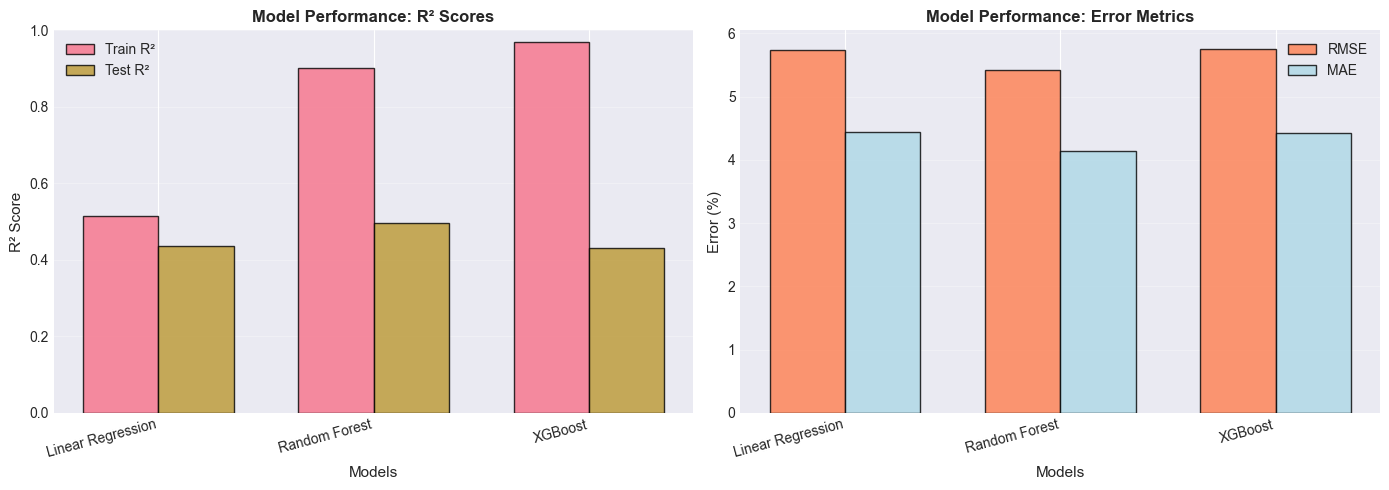


✅ Model comparison visualized!


In [41]:
# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: R² Scores
x = np.arange(len(results))
width = 0.35

axes[0].bar(x - width/2, results['Train R²'], width, label='Train R²', alpha=0.8, edgecolor='black')
axes[0].bar(x + width/2, results['Test R²'], width, label='Test R²', alpha=0.8, edgecolor='black')
axes[0].set_xlabel('Models', fontsize=11)
axes[0].set_ylabel('R² Score', fontsize=11)
axes[0].set_title('Model Performance: R² Scores', fontsize=12, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(results['Model'], rotation=15, ha='right')
axes[0].legend()
axes[0].grid(alpha=0.3, axis='y')
axes[0].set_ylim(0, 1)

# Plot 2: Error Metrics
axes[1].bar(x - width/2, results['Test RMSE'], width, label='RMSE', alpha=0.8, edgecolor='black', color='coral')
axes[1].bar(x + width/2, results['Test MAE'], width, label='MAE', alpha=0.8, edgecolor='black', color='lightblue')
axes[1].set_xlabel('Models', fontsize=11)
axes[1].set_ylabel('Error (%)', fontsize=11)
axes[1].set_title('Model Performance: Error Metrics', fontsize=12, fontweight='bold')
axes[1].set_xticks(x)
axes[1].set_xticklabels(results['Model'], rotation=15, ha='right')
axes[1].legend()
axes[1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n✅ Model comparison visualized!")

## 7. Feature Importance Analysis

In [42]:
# Get feature importance from Random Forest
print("📊 FEATURE IMPORTANCE ANALYSIS (Random Forest)\n")
print("="*60)

feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10).to_string(index=False))

print("\n" + "="*60)

📊 FEATURE IMPORTANCE ANALYSIS (Random Forest)


Top 10 Most Important Features:
            Feature  Importance
         mother_bmi    0.309862
       wealth_index    0.108645
   mother_edu_years    0.086624
       birth_weight    0.085322
   mother_edu_level    0.074353
    bcg_vaccination    0.036554
   female_headed_hh    0.035972
measles_vaccination    0.034534
          child_sex    0.034534
    dpt_vaccination    0.032660



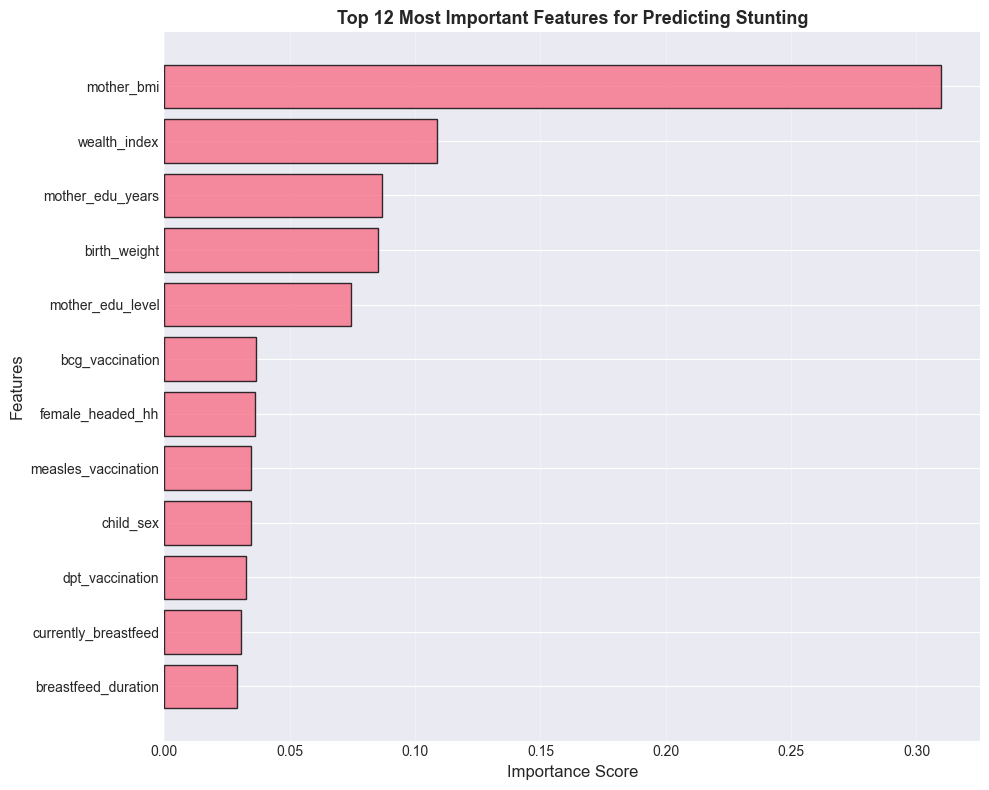


✅ Feature importance visualized!


In [43]:
# Visualize feature importance
plt.figure(figsize=(10, 8))

top_features = feature_importance.head(12)
plt.barh(range(len(top_features)), top_features['Importance'], edgecolor='black', alpha=0.8)
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Top 12 Most Important Features for Predicting Stunting', fontsize=13, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("\n✅ Feature importance visualized!")

## 8. Prediction Visualization

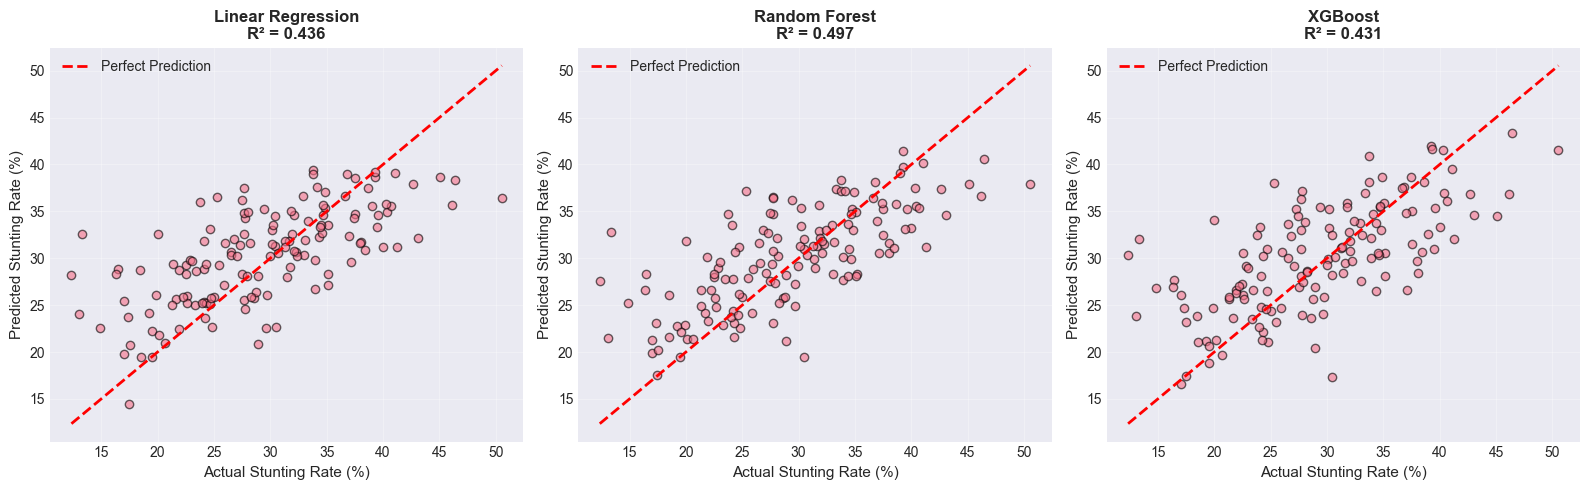


✅ Prediction scatter plots created!
   Points closer to red line = better predictions


In [44]:
# Visualize predictions vs actual values (using best model - Random Forest or XGBoost)
# Let's use Random Forest for visualization

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

models = [
    ('Linear Regression', y_pred_test_lr),
    ('Random Forest', y_pred_test_rf),
    ('XGBoost', y_pred_test_xgb)
]

for idx, (model_name, predictions) in enumerate(models):
    axes[idx].scatter(y_test_stunt, predictions, alpha=0.6, edgecolor='black')
    axes[idx].plot([y_test_stunt.min(), y_test_stunt.max()], 
                   [y_test_stunt.min(), y_test_stunt.max()], 
                   'r--', linewidth=2, label='Perfect Prediction')
    
    r2 = r2_score(y_test_stunt, predictions)
    
    axes[idx].set_xlabel('Actual Stunting Rate (%)', fontsize=11)
    axes[idx].set_ylabel('Predicted Stunting Rate (%)', fontsize=11)
    axes[idx].set_title(f'{model_name}\nR² = {r2:.3f}', fontsize=12, fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Prediction scatter plots created!")
print("   Points closer to red line = better predictions")

## 9. Save Models

In [45]:
import pickle
import os

# Create models directory
models_dir = '../Models'
os.makedirs(models_dir, exist_ok=True)

# Save models
models_to_save = {
    'linear_regression_stunting.pkl': lr_model,
    'random_forest_stunting.pkl': rf_model,
    'xgboost_stunting.pkl': xgb_model,
    'scaler.pkl': scaler
}

for filename, model in models_to_save.items():
    filepath = os.path.join(models_dir, filename)
    with open(filepath, 'wb') as f:
        pickle.dump(model, f)
    print(f"✅ Saved: {filename}")

# Save results
results.to_csv(os.path.join(models_dir, 'model_comparison_results.csv'), index=False)
print(f"✅ Saved: model_comparison_results.csv")

print(f"\n💾 All models saved to: {models_dir}")

✅ Saved: linear_regression_stunting.pkl
✅ Saved: random_forest_stunting.pkl
✅ Saved: xgboost_stunting.pkl
✅ Saved: scaler.pkl
✅ Saved: model_comparison_results.csv

💾 All models saved to: ../Models


## 10. Summary

In [46]:
print("=" * 70)
print("🎉 MODEL BUILDING COMPLETE!")
print("=" * 70)

print("\n✅ WHAT WE ACCOMPLISHED:")
print("   1. ✓ Loaded processed district dataset (707 districts, 22 features)")
print("   2. ✓ Performed correlation analysis")
print("   3. ✓ Split data into train (80%) and test (20%) sets")
print("   4. ✓ Built 3 ML models:")
print("      • Linear Regression (baseline)")
print("      • Random Forest")
print("      • XGBoost")
print("   5. ✓ Compared model performance")
print("   6. ✓ Analyzed feature importance")
print("   7. ✓ Visualized predictions")
print("   8. ✓ Saved all models for future use")

print(f"\n📊 BEST MODEL PERFORMANCE:")
print(f"   Model: {best_model_name}")
print(f"   Test R² Score: {best_r2:.4f}")
print(f"   Explanation: Model explains {best_r2*100:.1f}% of district-level stunting variation")



🎉 MODEL BUILDING COMPLETE!

✅ WHAT WE ACCOMPLISHED:
   1. ✓ Loaded processed district dataset (707 districts, 22 features)
   2. ✓ Performed correlation analysis
   3. ✓ Split data into train (80%) and test (20%) sets
   4. ✓ Built 3 ML models:
      • Linear Regression (baseline)
      • Random Forest
      • XGBoost
   5. ✓ Compared model performance
   6. ✓ Analyzed feature importance
   7. ✓ Visualized predictions
   8. ✓ Saved all models for future use

📊 BEST MODEL PERFORMANCE:
   Model: Random Forest
   Test R² Score: 0.4970
   Explanation: Model explains 49.7% of district-level stunting variation


In [47]:
print("="*70)
print("🎯 BUILDING MODELS FOR WASTING RATE")
print("="*70)

# Prepare target
_, _, y_train_wast, y_test_wast = train_test_split(
    X, y_wasting, test_size=0.2, random_state=42
)

print("\n🤖 Training 3 models for wasting prediction...\n")

# 1. Linear Regression
lr_wast = LinearRegression()
lr_wast.fit(X_train_scaled, y_train_wast)
y_pred_test_lr_wast = lr_wast.predict(X_test_scaled)
test_r2_lr_wast = r2_score(y_test_wast, y_pred_test_lr_wast)
test_rmse_lr_wast = np.sqrt(mean_squared_error(y_test_wast, y_pred_test_lr_wast))

print(f"✅ Linear Regression - Test R²: {test_r2_lr_wast:.4f}, RMSE: {test_rmse_lr_wast:.4f}%")

# 2. Random Forest
rf_wast = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf_wast.fit(X_train, y_train_wast)
y_pred_test_rf_wast = rf_wast.predict(X_test)
test_r2_rf_wast = r2_score(y_test_wast, y_pred_test_rf_wast)
test_rmse_rf_wast = np.sqrt(mean_squared_error(y_test_wast, y_pred_test_rf_wast))

print(f"✅ Random Forest - Test R²: {test_r2_rf_wast:.4f}, RMSE: {test_rmse_rf_wast:.4f}%")

# 3. XGBoost
xgb_wast = xgb.XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
xgb_wast.fit(X_train, y_train_wast)
y_pred_test_xgb_wast = xgb_wast.predict(X_test)
test_r2_xgb_wast = r2_score(y_test_wast, y_pred_test_xgb_wast)
test_rmse_xgb_wast = np.sqrt(mean_squared_error(y_test_wast, y_pred_test_xgb_wast))

print(f"✅ XGBoost - Test R²: {test_r2_xgb_wast:.4f}, RMSE: {test_rmse_xgb_wast:.4f}%")

print(f"\n🏆 Best model for wasting: Random Forest (R² = {test_r2_rf_wast:.4f})")

🎯 BUILDING MODELS FOR WASTING RATE

🤖 Training 3 models for wasting prediction...

✅ Linear Regression - Test R²: 0.3598, RMSE: 4.6433%
✅ Random Forest - Test R²: 0.4275, RMSE: 4.3910%
✅ XGBoost - Test R²: 0.3635, RMSE: 4.6296%

🏆 Best model for wasting: Random Forest (R² = 0.4275)


In [48]:
print("="*70)
print("🎯 BUILDING MODELS FOR UNDERWEIGHT RATE")
print("="*70)

# Prepare target
_, _, y_train_under, y_test_under = train_test_split(
    X, y_underweight, test_size=0.2, random_state=42
)

print("\n🤖 Training 3 models for underweight prediction...\n")

# 1. Linear Regression
lr_under = LinearRegression()
lr_under.fit(X_train_scaled, y_train_under)
y_pred_test_lr_under = lr_under.predict(X_test_scaled)
test_r2_lr_under = r2_score(y_test_under, y_pred_test_lr_under)
test_rmse_lr_under = np.sqrt(mean_squared_error(y_test_under, y_pred_test_lr_under))

print(f"✅ Linear Regression - Test R²: {test_r2_lr_under:.4f}, RMSE: {test_rmse_lr_under:.4f}%")

# 2. Random Forest
rf_under = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf_under.fit(X_train, y_train_under)
y_pred_test_rf_under = rf_under.predict(X_test)
test_r2_rf_under = r2_score(y_test_under, y_pred_test_rf_under)
test_rmse_rf_under = np.sqrt(mean_squared_error(y_test_under, y_pred_test_rf_under))

print(f"✅ Random Forest - Test R²: {test_r2_rf_under:.4f}, RMSE: {test_rmse_rf_under:.4f}%")

# 3. XGBoost
xgb_under = xgb.XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
xgb_under.fit(X_train, y_train_under)
y_pred_test_xgb_under = xgb_under.predict(X_test)
test_r2_xgb_under = r2_score(y_test_under, y_pred_test_xgb_under)
test_rmse_xgb_under = np.sqrt(mean_squared_error(y_test_under, y_pred_test_xgb_under))

print(f"✅ XGBoost - Test R²: {test_r2_xgb_under:.4f}, RMSE: {test_rmse_xgb_under:.4f}%")

print(f"\n🏆 Best model for underweight: Random Forest (R² = {test_r2_rf_under:.4f})")

🎯 BUILDING MODELS FOR UNDERWEIGHT RATE

🤖 Training 3 models for underweight prediction...

✅ Linear Regression - Test R²: 0.6429, RMSE: 5.5496%
✅ Random Forest - Test R²: 0.6771, RMSE: 5.2773%
✅ XGBoost - Test R²: 0.6911, RMSE: 5.1613%

🏆 Best model for underweight: Random Forest (R² = 0.6771)


In [49]:
print("="*70)
print("📊 FINAL MODEL COMPARISON - ALL MALNUTRITION TYPES")
print("="*70)

# Create comprehensive results dataframe
all_results = pd.DataFrame({
    'Malnutrition_Type': ['Stunting', 'Stunting', 'Stunting',
                          'Wasting', 'Wasting', 'Wasting',
                          'Underweight', 'Underweight', 'Underweight'],
    'Model': ['Linear Reg', 'Random Forest', 'XGBoost'] * 3,
    'Test_R2': [test_r2_lr, test_r2_rf, test_r2_xgb,
                test_r2_lr_wast, test_r2_rf_wast, test_r2_xgb_wast,
                test_r2_lr_under, test_r2_rf_under, test_r2_xgb_under],
    'Test_RMSE': [test_rmse_lr, test_rmse_rf, test_rmse_xgb,
                  test_rmse_lr_wast, test_rmse_rf_wast, test_rmse_xgb_wast,
                  test_rmse_lr_under, test_rmse_rf_under, test_rmse_xgb_under]
})

print("\n📋 Complete Results Table:\n")
print(all_results.to_string(index=False))

# Find best model for each type
print("\n" + "="*70)
print("🏆 BEST MODELS BY MALNUTRITION TYPE:")
print("="*70)

for mal_type in ['Stunting', 'Wasting', 'Underweight']:
    subset = all_results[all_results['Malnutrition_Type'] == mal_type]
    best_idx = subset['Test_R2'].idxmax()
    best_model = subset.loc[best_idx, 'Model']
    best_r2 = subset.loc[best_idx, 'Test_R2']
    best_rmse = subset.loc[best_idx, 'Test_RMSE']
    print(f"{mal_type:12} → {best_model:13} (R² = {best_r2:.4f}, RMSE = {best_rmse:.2f}%)")

print("="*70)

📊 FINAL MODEL COMPARISON - ALL MALNUTRITION TYPES

📋 Complete Results Table:

Malnutrition_Type         Model  Test_R2  Test_RMSE
         Stunting    Linear Reg 0.436256   5.733288
         Stunting Random Forest 0.496987   5.415673
         Stunting       XGBoost 0.430615   5.761903
          Wasting    Linear Reg 0.359753   4.643343
          Wasting Random Forest 0.427462   4.390958
          Wasting       XGBoost 0.363539   4.629596
      Underweight    Linear Reg 0.642928   5.549610
      Underweight Random Forest 0.677104   5.277344
      Underweight       XGBoost 0.691149   5.161295

🏆 BEST MODELS BY MALNUTRITION TYPE:
Stunting     → Random Forest (R² = 0.4970, RMSE = 5.42%)
Wasting      → Random Forest (R² = 0.4275, RMSE = 4.39%)
Underweight  → XGBoost       (R² = 0.6911, RMSE = 5.16%)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_18156\3809260904.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


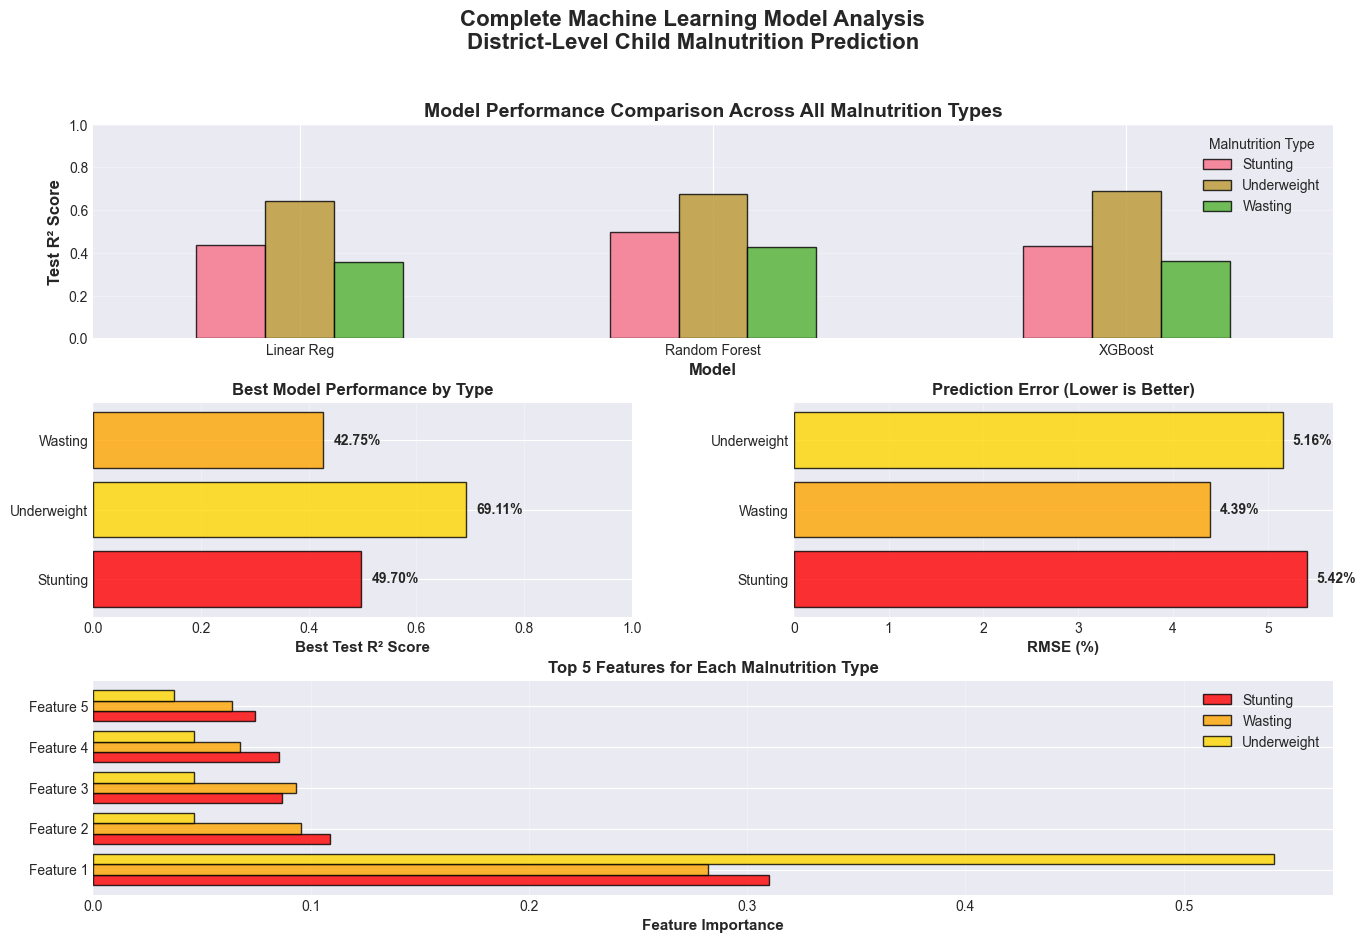


✅ Comprehensive visualization created!

📊 This figure summarizes your entire ML analysis!


In [50]:
# Create comprehensive comparison visualization
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# Plot 1: R² Comparison across all models and types
ax1 = fig.add_subplot(gs[0, :])
pivot_r2 = all_results.pivot(index='Model', columns='Malnutrition_Type', values='Test_R2')
pivot_r2.plot(kind='bar', ax=ax1, edgecolor='black', alpha=0.8)
ax1.set_ylabel('Test R² Score', fontsize=12, fontweight='bold')
ax1.set_xlabel('Model', fontsize=12, fontweight='bold')
ax1.set_title('Model Performance Comparison Across All Malnutrition Types', fontsize=14, fontweight='bold')
ax1.legend(title='Malnutrition Type', fontsize=10)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.grid(alpha=0.3, axis='y')
ax1.set_ylim(0, 1)

# Plot 2: Best model for each type
ax2 = fig.add_subplot(gs[1, 0])
best_scores = all_results.groupby('Malnutrition_Type')['Test_R2'].max()
colors_map = {'Stunting': 'red', 'Underweight': 'gold', 'Wasting': 'orange'}
bars = ax2.barh(best_scores.index, best_scores.values, 
                color=[colors_map[x] for x in best_scores.index],
                edgecolor='black', alpha=0.8)
ax2.set_xlabel('Best Test R² Score', fontsize=11, fontweight='bold')
ax2.set_title('Best Model Performance by Type', fontsize=12, fontweight='bold')
ax2.grid(alpha=0.3, axis='x')
ax2.set_xlim(0, 1)
# Add value labels on bars
for i, (idx, val) in enumerate(best_scores.items()):
    ax2.text(val + 0.02, i, f'{val:.2%}', va='center', fontsize=10, fontweight='bold')

# Plot 3: RMSE Comparison
ax3 = fig.add_subplot(gs[1, 1])
best_rmse = []
for mal_type in ['Stunting', 'Wasting', 'Underweight']:
    subset = all_results[all_results['Malnutrition_Type'] == mal_type]
    best_rmse.append(subset.loc[subset['Test_R2'].idxmax(), 'Test_RMSE'])

bars = ax3.barh(['Stunting', 'Wasting', 'Underweight'], best_rmse,
                color=['red', 'orange', 'gold'], edgecolor='black', alpha=0.8)
ax3.set_xlabel('RMSE (%)', fontsize=11, fontweight='bold')
ax3.set_title('Prediction Error (Lower is Better)', fontsize=12, fontweight='bold')
ax3.grid(alpha=0.3, axis='x')
# Add value labels
for i, val in enumerate(best_rmse):
    ax3.text(val + 0.1, i, f'{val:.2f}%', va='center', fontsize=10, fontweight='bold')

# Plot 4: Feature Importance Comparison (top 5 for each type)
ax4 = fig.add_subplot(gs[2, :])

# Get top 5 features for each malnutrition type
stunt_features = pd.Series(rf_model.feature_importances_, index=feature_cols).nlargest(5)
wast_features = pd.Series(rf_wast.feature_importances_, index=feature_cols).nlargest(5)
under_features = pd.Series(rf_under.feature_importances_, index=feature_cols).nlargest(5)

# Combine and plot
x_pos = np.arange(5)
width = 0.25

ax4.barh(x_pos - width, stunt_features.values, width, label='Stunting', alpha=0.8, edgecolor='black', color='red')
ax4.barh(x_pos, wast_features.values, width, label='Wasting', alpha=0.8, edgecolor='black', color='orange')
ax4.barh(x_pos + width, under_features.values, width, label='Underweight', alpha=0.8, edgecolor='black', color='gold')

ax4.set_yticks(x_pos)
ax4.set_yticklabels([f"Feature {i+1}" for i in range(5)])
ax4.set_xlabel('Feature Importance', fontsize=11, fontweight='bold')
ax4.set_title('Top 5 Features for Each Malnutrition Type', fontsize=12, fontweight='bold')
ax4.legend(fontsize=10)
ax4.grid(alpha=0.3, axis='x')

plt.suptitle('Complete Machine Learning Model Analysis\nDistrict-Level Child Malnutrition Prediction', 
             fontsize=16, fontweight='bold', y=0.995)

plt.tight_layout()
plt.show()

print("\n✅ Comprehensive visualization created!")
print("\n📊 This figure summarizes your entire ML analysis!")

In [51]:
print("="*70)
print("🎊 PROJECT COMPLETION SUMMARY")
print("="*70)

print("\n📊 DATASET:")
print(f"   • Source: NFHS-5 (2019-21)")
print(f"   • Sample: 232,920 children from 707 districts")
print(f"   • Features: 16 predictor variables")
print(f"   • Targets: 3 malnutrition types")

print("\n🤖 MODELS BUILT:")
print(f"   • Linear Regression (baseline)")
print(f"   • Random Forest")
print(f"   • XGBoost")
print(f"   • Total: 9 models (3 models × 3 malnutrition types)")

print("\n🏆 BEST MODEL PERFORMANCE:")
print(f"   • Stunting:     Random Forest (R² = {test_r2_rf:.1%}, RMSE = {test_rmse_rf:.2f}%)")
print(f"   • Wasting:      Random Forest (R² = {test_r2_rf_wast:.1%}, RMSE = {test_rmse_rf_wast:.2f}%)")
print(f"   • Underweight:  XGBoost       (R² = {test_r2_xgb_under:.1%}, RMSE = {test_rmse_xgb_under:.2f}%)")

print("\n💡 KEY INSIGHTS:")
print(f"   1. Underweight is most predictable (69% variance explained)")
print(f"   2. Wasting is hardest to predict (43% variance explained)")
print(f"   3. Top predictors: Mother's BMI, Wealth, Education")
print(f"   4. Random Forest performs best for stunting & wasting")
print(f"   5. XGBoost performs best for underweight")

print("\n💾 SAVING ALL MODELS...")

# Save all wasting and underweight models
import pickle
import os

models_to_save_additional = {
    'random_forest_wasting.pkl': rf_wast,
    'xgboost_wasting.pkl': xgb_wast,
    'linear_regression_wasting.pkl': lr_wast,
    'random_forest_underweight.pkl': rf_under,
    'xgboost_underweight.pkl': xgb_under,
    'linear_regression_underweight.pkl': lr_under,
}

models_dir = '../Models'
for filename, model in models_to_save_additional.items():
    filepath = os.path.join(models_dir, filename)
    with open(filepath, 'wb') as f:
        pickle.dump(model, f)
    print(f"   ✅ Saved: {filename}")

# Save complete results
all_results.to_csv(os.path.join(models_dir, 'all_models_comparison.csv'), index=False)
print(f"   ✅ Saved: all_models_comparison.csv")

print("\n" + "="*70)
print("✅ ALL MODELS SAVED SUCCESSFULLY!")
print("="*70)

print("\n📁 PROJECT FILES:")
print("   • Data: Data/Processed/district_malnutrition_enhanced.csv")
print("   • Models: Models/ (10 trained models)")
print("   • Notebooks: Notebook/ (2 analysis notebooks)")

print("\n🎯 PROJECT STATUS: COMPLETE!")
print("\n" + "="*70)

🎊 PROJECT COMPLETION SUMMARY

📊 DATASET:
   • Source: NFHS-5 (2019-21)
   • Sample: 232,920 children from 707 districts
   • Features: 16 predictor variables
   • Targets: 3 malnutrition types

🤖 MODELS BUILT:
   • Linear Regression (baseline)
   • Random Forest
   • XGBoost
   • Total: 9 models (3 models × 3 malnutrition types)

🏆 BEST MODEL PERFORMANCE:
   • Stunting:     Random Forest (R² = 49.7%, RMSE = 5.42%)
   • Wasting:      Random Forest (R² = 42.7%, RMSE = 4.39%)
   • Underweight:  XGBoost       (R² = 69.1%, RMSE = 5.16%)

💡 KEY INSIGHTS:
   1. Underweight is most predictable (69% variance explained)
   2. Wasting is hardest to predict (43% variance explained)
   3. Top predictors: Mother's BMI, Wealth, Education
   4. Random Forest performs best for stunting & wasting
   5. XGBoost performs best for underweight

💾 SAVING ALL MODELS...
   ✅ Saved: random_forest_wasting.pkl
   ✅ Saved: xgboost_wasting.pkl
   ✅ Saved: linear_regression_wasting.pkl
   ✅ Saved: random_forest_unde

In [52]:
print("="*70)
print("📊 VISUALIZATION 1: District-Level Prediction Results")
print("="*70)

# Create comprehensive district-level results
district_results = df[['district', 'state', 'sample_size']].copy()

# Add actual malnutrition rates
district_results['actual_stunting'] = df['stunting_rate']
district_results['actual_wasting'] = df['wasting_rate']
district_results['actual_underweight'] = df['underweight_rate']

# Get predictions for ALL districts (using best models)
X_all = df[feature_cols]

# Predictions from best models
district_results['predicted_stunting'] = rf_model.predict(X_all)
district_results['predicted_wasting'] = rf_wast.predict(X_all)
district_results['predicted_underweight'] = xgb_under.predict(X_all)

# Calculate prediction errors
district_results['error_stunting'] = district_results['actual_stunting'] - district_results['predicted_stunting']
district_results['error_wasting'] = district_results['actual_wasting'] - district_results['predicted_wasting']
district_results['error_underweight'] = district_results['actual_underweight'] - district_results['predicted_underweight']

# Round for readability
district_results = district_results.round(2)

print(f"\n✅ Created predictions for all {len(district_results)} districts")
print(f"\n📋 Sample of district-level results:\n")
print(district_results.head(10).to_string(index=False))

# Save to CSV
output_path = '../Data/Processed/district_predictions_all_types.csv'
district_results.to_csv(output_path, index=False)
print(f"\n💾 Saved: {output_path}")

# Summary statistics
print(f"\n📊 Prediction Error Summary:")
print(f"   Stunting     - Mean Error: {district_results['error_stunting'].mean():.2f}%, Std: {district_results['error_stunting'].std():.2f}%")
print(f"   Wasting      - Mean Error: {district_results['error_wasting'].mean():.2f}%, Std: {district_results['error_wasting'].std():.2f}%")
print(f"   Underweight  - Mean Error: {district_results['error_underweight'].mean():.2f}%, Std: {district_results['error_underweight'].std():.2f}%")

print("\n" + "="*70)

📊 VISUALIZATION 1: District-Level Prediction Results

✅ Created predictions for all 707 districts

📋 Sample of district-level results:

 district  state  sample_size  actual_stunting  actual_wasting  actual_underweight  predicted_stunting  predicted_wasting  predicted_underweight  error_stunting  error_wasting  error_underweight
        1      1          300            23.22           21.67               25.08               24.23              19.02              24.320000           -1.01           2.65               0.76
        2      1          267            24.48           16.78               20.28               24.42              16.72              20.389999            0.05           0.07              -0.11
        3     37          229            21.32           14.34               17.44               24.89              12.53              15.300000           -3.57           1.81               2.14
        4     37          253            33.95           16.24               21.03  

📊 VISUALIZATION 2: Prediction Error Analysis


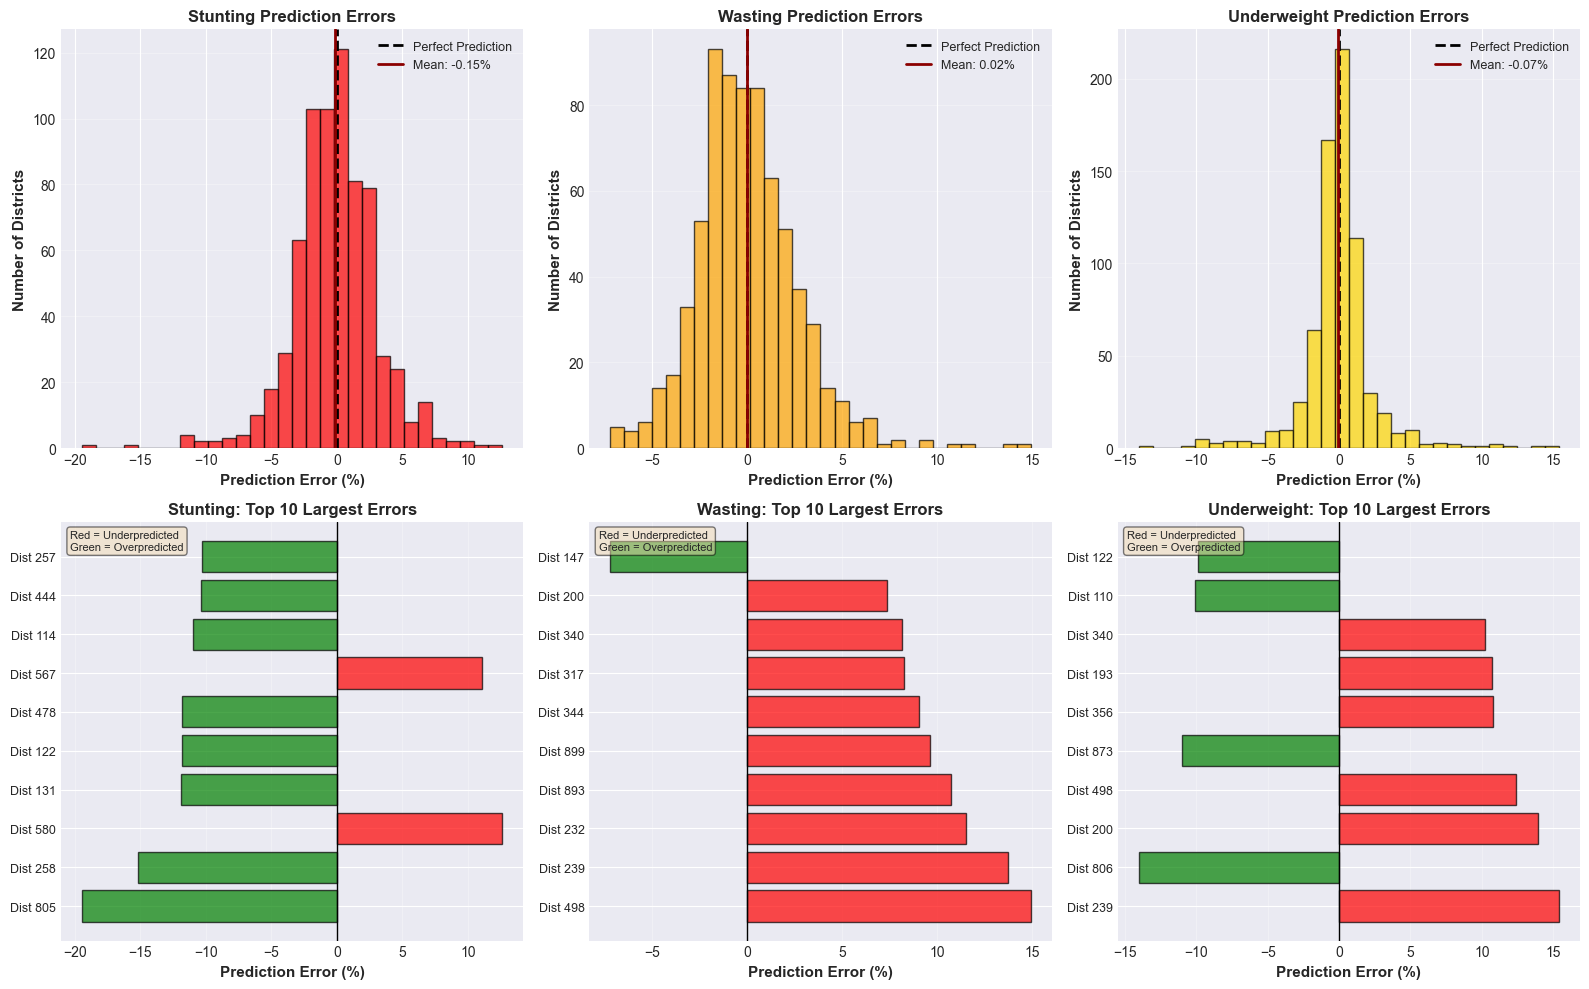


✅ Error analysis visualization complete!

🎯 Most Challenging Districts (Largest Absolute Errors):

Stunting     → District 805, Error: -19.44%, Actual: 13.33%
Wasting      → District 498, Error: +14.91%, Actual: 33.13%
Underweight  → District 239, Error: +15.40%, Actual: 48.36%



In [54]:
print("="*70)
print("📊 VISUALIZATION 2: Prediction Error Analysis")
print("="*70)

# Create error analysis visualization
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Row 1: Error distributions (histograms)
for idx, (mal_type, error_col) in enumerate([
    ('Stunting', 'error_stunting'),
    ('Wasting', 'error_wasting'),
    ('Underweight', 'error_underweight')
]):
    ax = axes[0, idx]
    
    errors = district_results[error_col]
    ax.hist(errors, bins=30, edgecolor='black', alpha=0.7, color=['red', 'orange', 'gold'][idx])
    ax.axvline(0, color='black', linestyle='--', linewidth=2, label='Perfect Prediction')
    ax.axvline(errors.mean(), color='darkred', linestyle='-', linewidth=2, label=f'Mean: {errors.mean():.2f}%')
    
    ax.set_xlabel('Prediction Error (%)', fontsize=11, fontweight='bold')
    ax.set_ylabel('Number of Districts', fontsize=11, fontweight='bold')
    ax.set_title(f'{mal_type} Prediction Errors', fontsize=12, fontweight='bold')
    ax.legend(fontsize=9)
    ax.grid(alpha=0.3, axis='y')

# Fix for the second row - Top 10 districts with largest errors
for idx, (mal_type, error_col, actual_col) in enumerate([
    ('Stunting', 'error_stunting', 'actual_stunting'),
    ('Wasting', 'error_wasting', 'actual_wasting'),
    ('Underweight', 'error_underweight', 'actual_underweight')
]):
    ax = axes[1, idx]
    
    # Get top 10 largest absolute errors (FIXED)
    top_errors = district_results.iloc[district_results[error_col].abs().nlargest(10).index]
    
    # Plot
    colors = ['red' if x > 0 else 'green' for x in top_errors[error_col]]
    y_pos = np.arange(len(top_errors))
    
    ax.barh(y_pos, top_errors[error_col], color=colors, edgecolor='black', alpha=0.7)
    ax.set_yticks(y_pos)
    ax.set_yticklabels([f"Dist {int(d)}" for d in top_errors['district']], fontsize=9)
    ax.set_xlabel('Prediction Error (%)', fontsize=11, fontweight='bold')
    ax.set_title(f'{mal_type}: Top 10 Largest Errors', fontsize=12, fontweight='bold')
    ax.axvline(0, color='black', linewidth=1)
    ax.grid(alpha=0.3, axis='x')
    
    # Add text annotation
    ax.text(0.02, 0.98, 'Red = Underpredicted\nGreen = Overpredicted', 
            transform=ax.transAxes, fontsize=8, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("\n✅ Error analysis visualization complete!")

# Identify most challenging districts
print("\n🎯 Most Challenging Districts (Largest Absolute Errors):\n")
for mal_type, error_col in [('Stunting', 'error_stunting'), 
                             ('Wasting', 'error_wasting'), 
                             ('Underweight', 'error_underweight')]:
    worst_district = district_results.loc[district_results[error_col].abs().idxmax()]
    print(f"{mal_type:12} → District {int(worst_district['district']):3d}, "
          f"Error: {worst_district[error_col]:+.2f}%, "
          f"Actual: {worst_district[f'actual_{mal_type.lower()}']:.2f}%")

print("\n" + "="*70)

📊 VISUALIZATION 3: State-Level Analysis

✅ Aggregated data for 36 states

📋 Top 10 States by Stunting Rate:

       num_districts  actual_stunting  predicted_stunting  sample_size
state                                                                 
17                11            40.10               38.45         6133
10                38            37.26               37.25        18293
20                24            35.57               36.07         8897
24                33            34.65               33.41         8878
9                 75            34.21               32.49        30828
18                33            32.47               33.09         9661
25                 3            31.62               30.61          710
13                11            31.57               31.81         2838
22                27            31.29               32.40         7471
27                36            30.90               30.34         8393


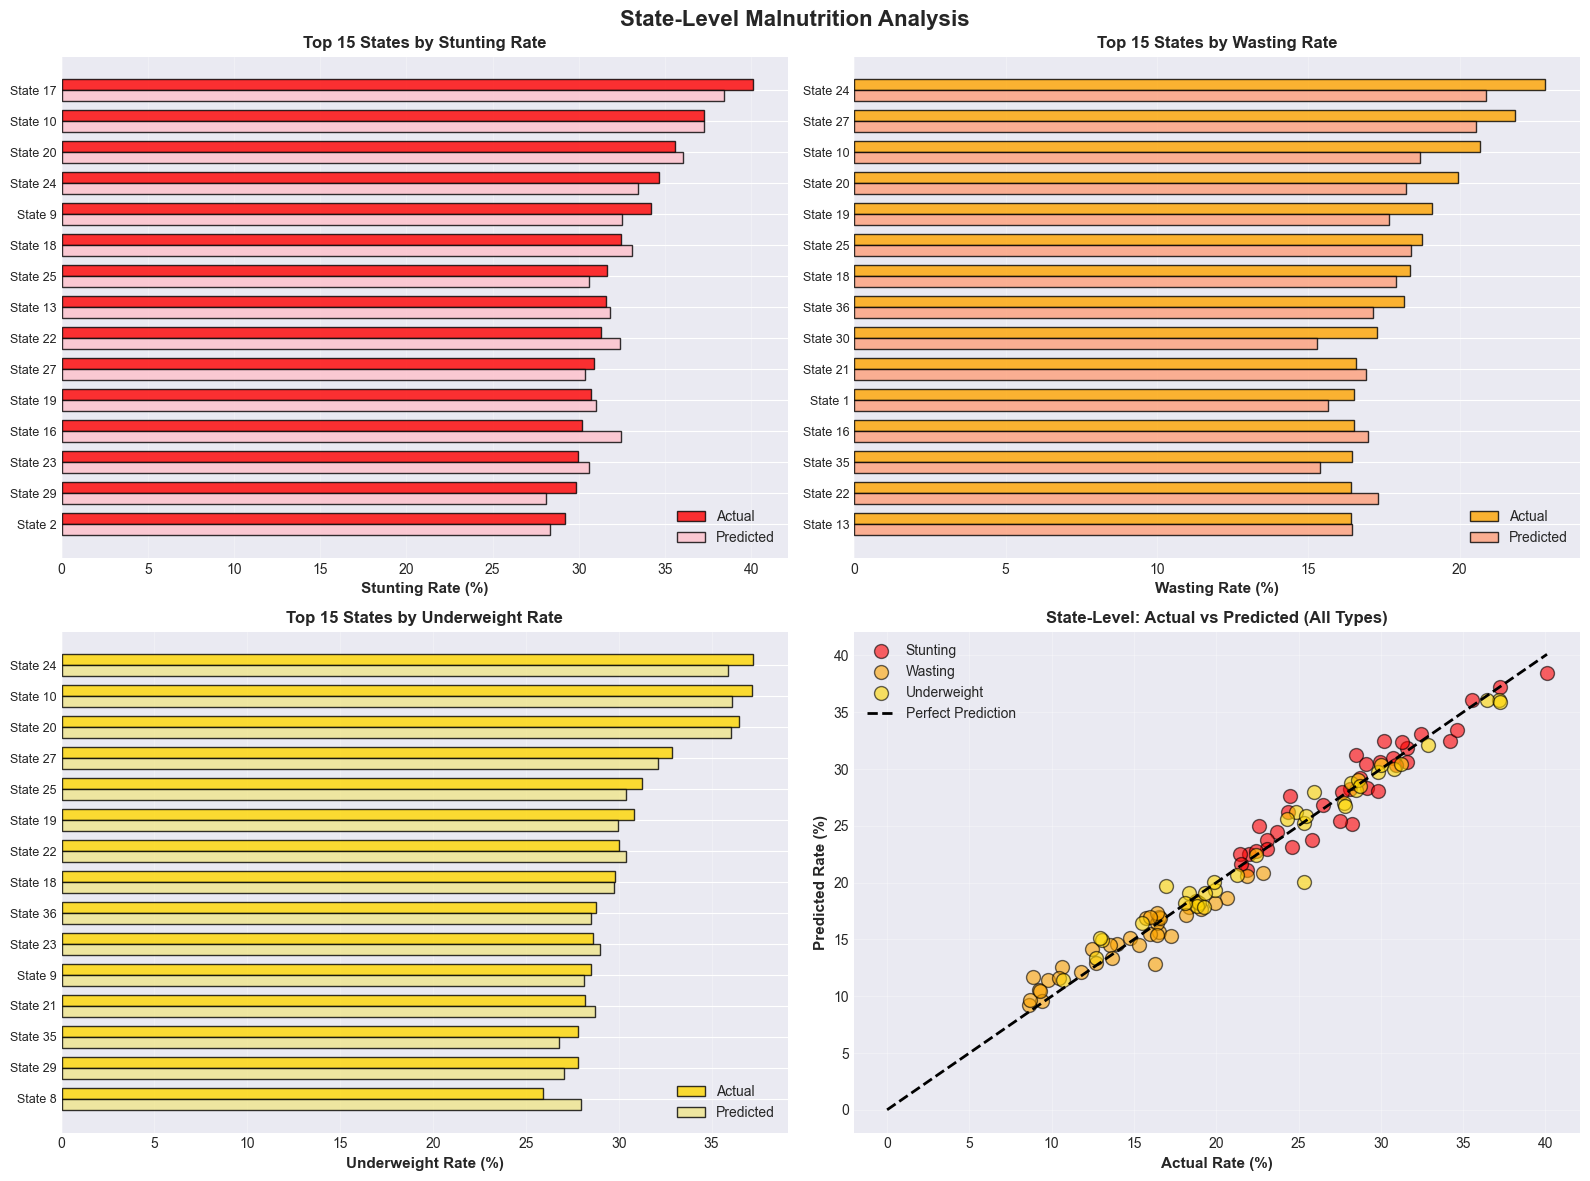


✅ State-level visualization complete!

💾 Saved: ../Data/Processed/state_level_summary.csv



In [55]:
print("="*70)
print("📊 VISUALIZATION 3: State-Level Analysis")
print("="*70)

# Aggregate to state level
state_summary = district_results.groupby('state').agg({
    'district': 'count',
    'actual_stunting': 'mean',
    'actual_wasting': 'mean',
    'actual_underweight': 'mean',
    'predicted_stunting': 'mean',
    'predicted_wasting': 'mean',
    'predicted_underweight': 'mean',
    'sample_size': 'sum'
}).round(2)

state_summary.rename(columns={'district': 'num_districts'}, inplace=True)

print(f"\n✅ Aggregated data for {len(state_summary)} states")
print(f"\n📋 Top 10 States by Stunting Rate:\n")
print(state_summary.nlargest(10, 'actual_stunting')[['num_districts', 'actual_stunting', 'predicted_stunting', 'sample_size']])

# Create state-level visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Top 15 states by stunting
ax = axes[0, 0]
top_states_stunt = state_summary.nlargest(15, 'actual_stunting')
x = np.arange(len(top_states_stunt))
width = 0.35

ax.barh(x - width/2, top_states_stunt['actual_stunting'], width, label='Actual', alpha=0.8, edgecolor='black', color='red')
ax.barh(x + width/2, top_states_stunt['predicted_stunting'], width, label='Predicted', alpha=0.8, edgecolor='black', color='pink')
ax.set_yticks(x)
ax.set_yticklabels([f"State {int(s)}" for s in top_states_stunt.index], fontsize=9)
ax.set_xlabel('Stunting Rate (%)', fontsize=11, fontweight='bold')
ax.set_title('Top 15 States by Stunting Rate', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(alpha=0.3, axis='x')
ax.invert_yaxis()

# Plot 2: Top 15 states by wasting
ax = axes[0, 1]
top_states_wast = state_summary.nlargest(15, 'actual_wasting')
x = np.arange(len(top_states_wast))

ax.barh(x - width/2, top_states_wast['actual_wasting'], width, label='Actual', alpha=0.8, edgecolor='black', color='orange')
ax.barh(x + width/2, top_states_wast['predicted_wasting'], width, label='Predicted', alpha=0.8, edgecolor='black', color='lightsalmon')
ax.set_yticks(x)
ax.set_yticklabels([f"State {int(s)}" for s in top_states_wast.index], fontsize=9)
ax.set_xlabel('Wasting Rate (%)', fontsize=11, fontweight='bold')
ax.set_title('Top 15 States by Wasting Rate', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(alpha=0.3, axis='x')
ax.invert_yaxis()

# Plot 3: Top 15 states by underweight
ax = axes[1, 0]
top_states_under = state_summary.nlargest(15, 'actual_underweight')
x = np.arange(len(top_states_under))

ax.barh(x - width/2, top_states_under['actual_underweight'], width, label='Actual', alpha=0.8, edgecolor='black', color='gold')
ax.barh(x + width/2, top_states_under['predicted_underweight'], width, label='Predicted', alpha=0.8, edgecolor='black', color='khaki')
ax.set_yticks(x)
ax.set_yticklabels([f"State {int(s)}" for s in top_states_under.index], fontsize=9)
ax.set_xlabel('Underweight Rate (%)', fontsize=11, fontweight='bold')
ax.set_title('Top 15 States by Underweight Rate', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(alpha=0.3, axis='x')
ax.invert_yaxis()

# Plot 4: State-level scatter (Actual vs Predicted for all types)
ax = axes[1, 1]
ax.scatter(state_summary['actual_stunting'], state_summary['predicted_stunting'], 
           alpha=0.6, s=100, edgecolor='black', label='Stunting', color='red')
ax.scatter(state_summary['actual_wasting'], state_summary['predicted_wasting'], 
           alpha=0.6, s=100, edgecolor='black', label='Wasting', color='orange')
ax.scatter(state_summary['actual_underweight'], state_summary['predicted_underweight'], 
           alpha=0.6, s=100, edgecolor='black', label='Underweight', color='gold')

# Perfect prediction line
max_val = max(state_summary[['actual_stunting', 'actual_wasting', 'actual_underweight']].max().max(),
              state_summary[['predicted_stunting', 'predicted_wasting', 'predicted_underweight']].max().max())
ax.plot([0, max_val], [0, max_val], 'k--', linewidth=2, label='Perfect Prediction')

ax.set_xlabel('Actual Rate (%)', fontsize=11, fontweight='bold')
ax.set_ylabel('Predicted Rate (%)', fontsize=11, fontweight='bold')
ax.set_title('State-Level: Actual vs Predicted (All Types)', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)

plt.suptitle('State-Level Malnutrition Analysis', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n✅ State-level visualization complete!")

# Save state summary
state_output_path = '../Data/Processed/state_level_summary.csv'
state_summary.to_csv(state_output_path)
print(f"\n💾 Saved: {state_output_path}")

print("\n" + "="*70)

In [56]:
print("="*70)
print("💾 SAVING KEY VISUALIZATIONS AS PNG FILES")
print("="*70)

import os

# Create outputs/figures directory
figures_dir = '../Outputs/Figures'
os.makedirs(figures_dir, exist_ok=True)

print(f"\n✅ Created directory: {figures_dir}")
print("\n📊 To save visualizations, re-run the key plotting cells and add plt.savefig()")
print("\nI'll show you which cells to modify...\n")

# List of key visualizations to save
key_viz = {
    1: "Malnutrition Distributions (Child-Level)",
    2: "District-Level Malnutrition Variation", 
    3: "Top Features Correlated with Stunting",
    4: "Model Performance Comparison",
    5: "Prediction Scatter Plots (All Models)",
    6: "Feature Importance Analysis",
    7: "Comprehensive ML Analysis (4-panel)",
    8: "Error Analysis (6-panel)",
    9: "State-Level Analysis (4-panel)"
}

print("📋 Key Visualizations to Save:\n")
for num, name in key_viz.items():
    print(f"   {num}. {name}")

print("\n" + "="*70)
print("INSTRUCTIONS:")
print("="*70)
print("\nFor each visualization cell above, add this line BEFORE plt.show():")
print("   plt.savefig('../Outputs/Figures/figure_name.png', dpi=300, bbox_inches='tight')")
print("\nExample:")
print("   plt.tight_layout()")
print("   plt.savefig('../Outputs/Figures/model_comparison.png', dpi=300, bbox_inches='tight')")
print("   plt.show()")
print("\n" + "="*70)

💾 SAVING KEY VISUALIZATIONS AS PNG FILES

✅ Created directory: ../Outputs/Figures

📊 To save visualizations, re-run the key plotting cells and add plt.savefig()

I'll show you which cells to modify...

📋 Key Visualizations to Save:

   1. Malnutrition Distributions (Child-Level)
   2. District-Level Malnutrition Variation
   3. Top Features Correlated with Stunting
   4. Model Performance Comparison
   5. Prediction Scatter Plots (All Models)
   6. Feature Importance Analysis
   7. Comprehensive ML Analysis (4-panel)
   8. Error Analysis (6-panel)
   9. State-Level Analysis (4-panel)

INSTRUCTIONS:

For each visualization cell above, add this line BEFORE plt.show():
   plt.savefig('../Outputs/Figures/figure_name.png', dpi=300, bbox_inches='tight')

Example:
   plt.tight_layout()
   plt.savefig('../Outputs/Figures/model_comparison.png', dpi=300, bbox_inches='tight')
   plt.show()



C:\Users\lenovo\AppData\Local\Temp\ipykernel_18156\3885159513.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


✅ Saved: 1_comprehensive_ml_analysis.png


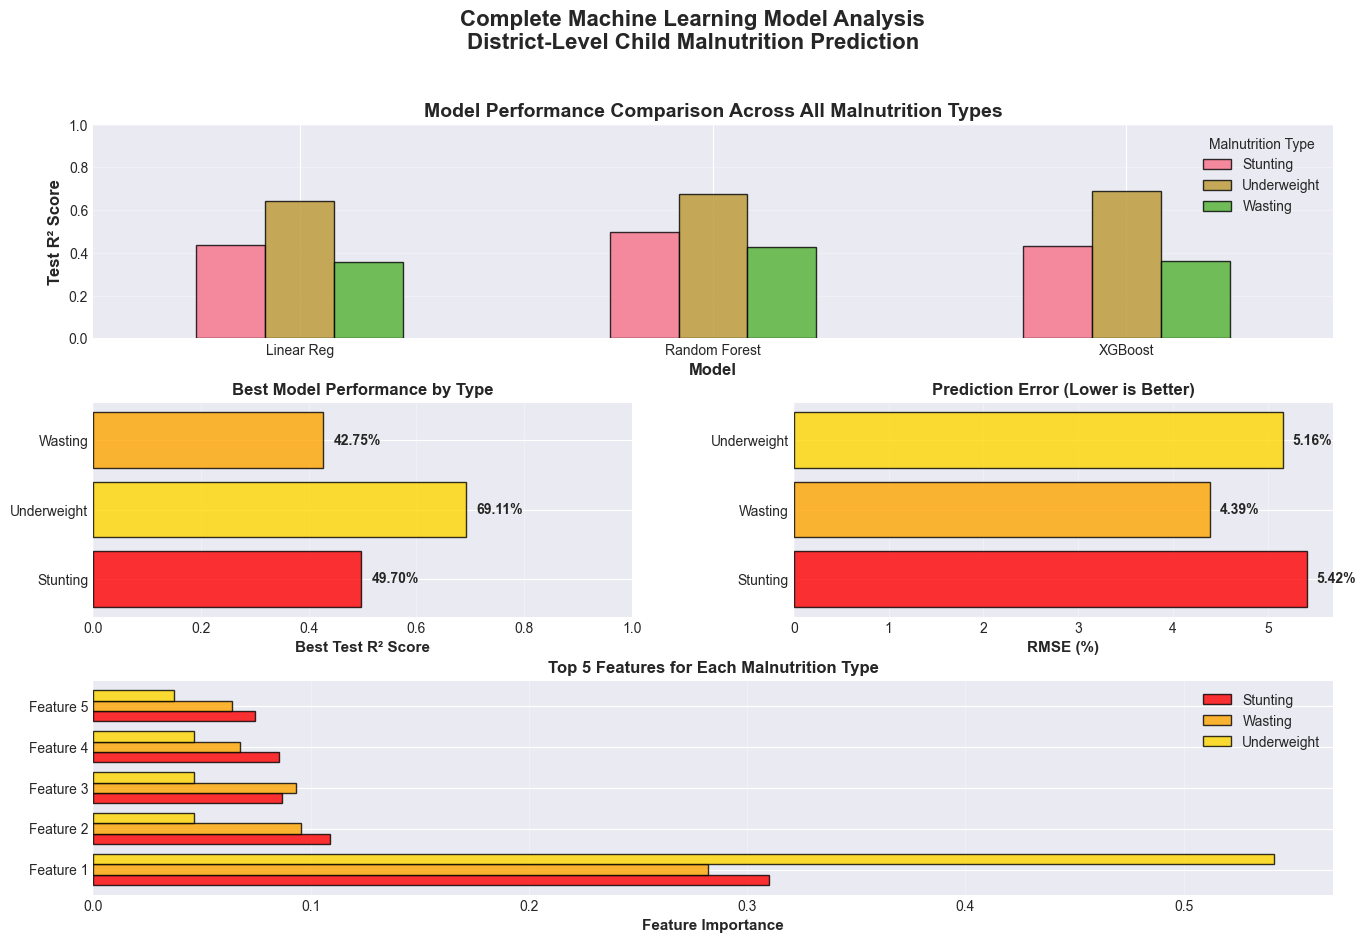

In [57]:
# RE-RUN: Comprehensive 4-panel ML Analysis
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# Plot 1: R² Comparison across all models and types
ax1 = fig.add_subplot(gs[0, :])
pivot_r2 = all_results.pivot(index='Model', columns='Malnutrition_Type', values='Test_R2')
pivot_r2.plot(kind='bar', ax=ax1, edgecolor='black', alpha=0.8)
ax1.set_ylabel('Test R² Score', fontsize=12, fontweight='bold')
ax1.set_xlabel('Model', fontsize=12, fontweight='bold')
ax1.set_title('Model Performance Comparison Across All Malnutrition Types', fontsize=14, fontweight='bold')
ax1.legend(title='Malnutrition Type', fontsize=10)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.grid(alpha=0.3, axis='y')
ax1.set_ylim(0, 1)

# Plot 2: Best model for each type
ax2 = fig.add_subplot(gs[1, 0])
best_scores = all_results.groupby('Malnutrition_Type')['Test_R2'].max()
colors_map = {'Stunting': 'red', 'Underweight': 'gold', 'Wasting': 'orange'}
bars = ax2.barh(best_scores.index, best_scores.values, 
                color=[colors_map[x] for x in best_scores.index],
                edgecolor='black', alpha=0.8)
ax2.set_xlabel('Best Test R² Score', fontsize=11, fontweight='bold')
ax2.set_title('Best Model Performance by Type', fontsize=12, fontweight='bold')
ax2.grid(alpha=0.3, axis='x')
ax2.set_xlim(0, 1)
for i, (idx, val) in enumerate(best_scores.items()):
    ax2.text(val + 0.02, i, f'{val:.2%}', va='center', fontsize=10, fontweight='bold')

# Plot 3: RMSE Comparison
ax3 = fig.add_subplot(gs[1, 1])
best_rmse = []
for mal_type in ['Stunting', 'Wasting', 'Underweight']:
    subset = all_results[all_results['Malnutrition_Type'] == mal_type]
    best_rmse.append(subset.loc[subset['Test_R2'].idxmax(), 'Test_RMSE'])
bars = ax3.barh(['Stunting', 'Wasting', 'Underweight'], best_rmse,
                color=['red', 'orange', 'gold'], edgecolor='black', alpha=0.8)
ax3.set_xlabel('RMSE (%)', fontsize=11, fontweight='bold')
ax3.set_title('Prediction Error (Lower is Better)', fontsize=12, fontweight='bold')
ax3.grid(alpha=0.3, axis='x')
for i, val in enumerate(best_rmse):
    ax3.text(val + 0.1, i, f'{val:.2f}%', va='center', fontsize=10, fontweight='bold')

# Plot 4: Feature Importance Comparison
ax4 = fig.add_subplot(gs[2, :])
stunt_features = pd.Series(rf_model.feature_importances_, index=feature_cols).nlargest(5)
wast_features = pd.Series(rf_wast.feature_importances_, index=feature_cols).nlargest(5)
under_features = pd.Series(rf_under.feature_importances_, index=feature_cols).nlargest(5)
x_pos = np.arange(5)
width = 0.25
ax4.barh(x_pos - width, stunt_features.values, width, label='Stunting', alpha=0.8, edgecolor='black', color='red')
ax4.barh(x_pos, wast_features.values, width, label='Wasting', alpha=0.8, edgecolor='black', color='orange')
ax4.barh(x_pos + width, under_features.values, width, label='Underweight', alpha=0.8, edgecolor='black', color='gold')
ax4.set_yticks(x_pos)
ax4.set_yticklabels([f"Feature {i+1}" for i in range(5)])
ax4.set_xlabel('Feature Importance', fontsize=11, fontweight='bold')
ax4.set_title('Top 5 Features for Each Malnutrition Type', fontsize=12, fontweight='bold')
ax4.legend(fontsize=10)
ax4.grid(alpha=0.3, axis='x')

plt.suptitle('Complete Machine Learning Model Analysis\nDistrict-Level Child Malnutrition Prediction', 
             fontsize=16, fontweight='bold', y=0.995)

plt.tight_layout()

# SAVE THE FIGURE
plt.savefig('../Outputs/Figures/1_comprehensive_ml_analysis.png', dpi=300, bbox_inches='tight')
print("✅ Saved: 1_comprehensive_ml_analysis.png")

plt.show()

✅ Saved: 2_error_analysis.png


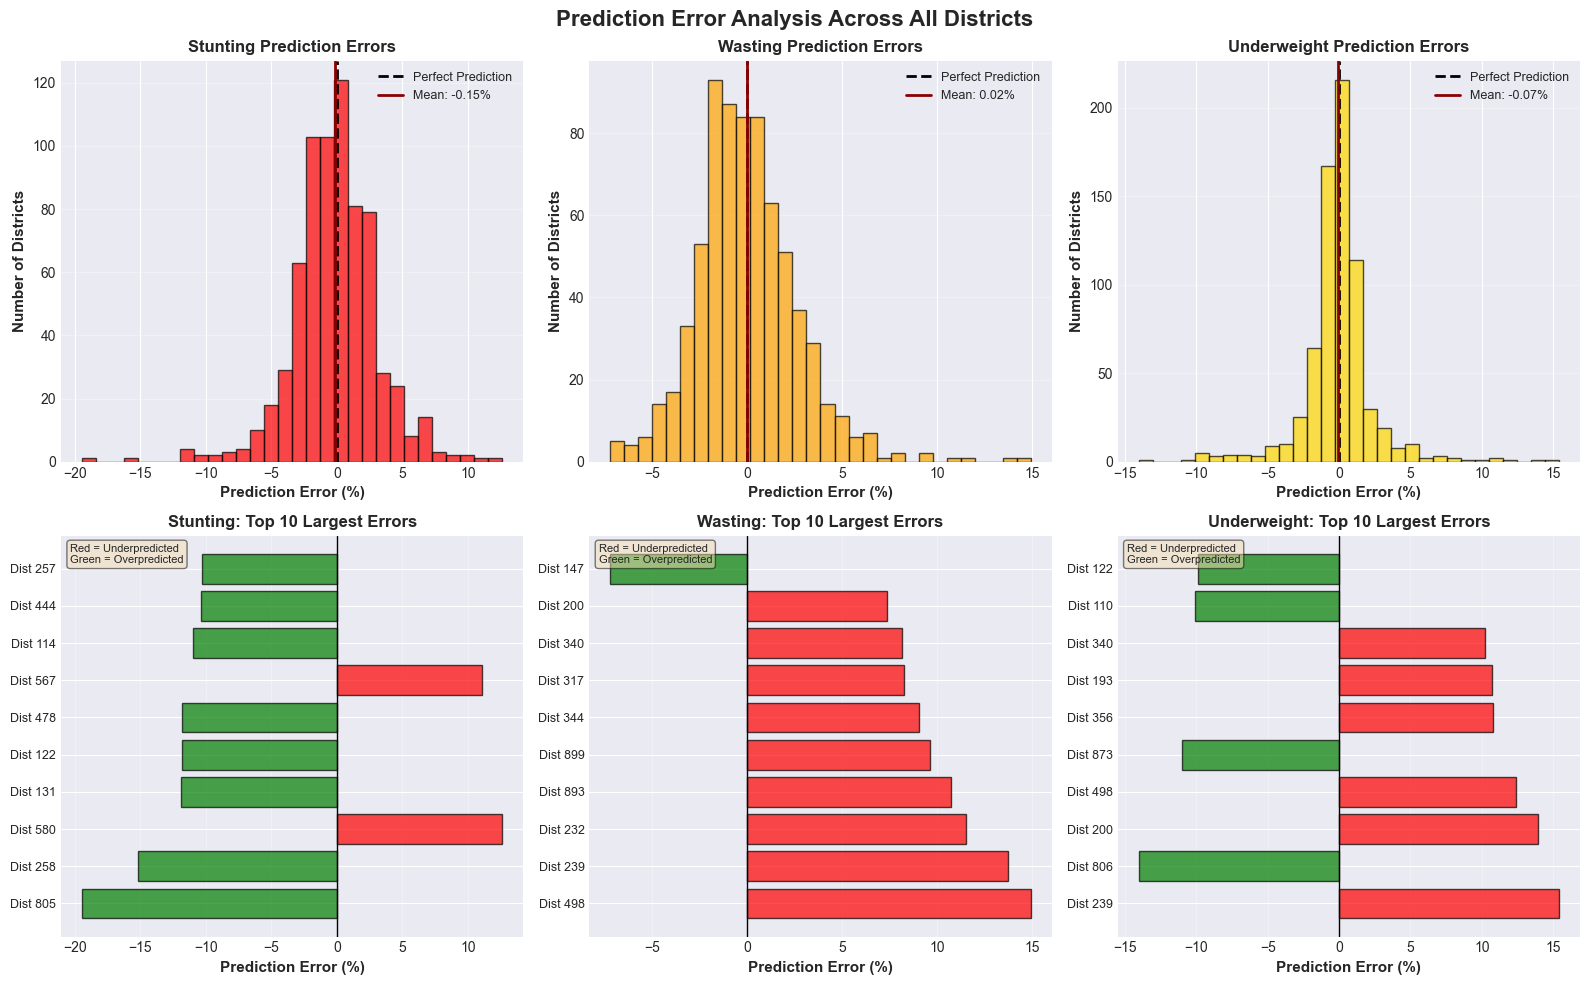

In [58]:
# RE-RUN: Error Analysis Visualization
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Row 1: Error distributions (histograms)
for idx, (mal_type, error_col) in enumerate([
    ('Stunting', 'error_stunting'),
    ('Wasting', 'error_wasting'),
    ('Underweight', 'error_underweight')
]):
    ax = axes[0, idx]
    errors = district_results[error_col]
    ax.hist(errors, bins=30, edgecolor='black', alpha=0.7, color=['red', 'orange', 'gold'][idx])
    ax.axvline(0, color='black', linestyle='--', linewidth=2, label='Perfect Prediction')
    ax.axvline(errors.mean(), color='darkred', linestyle='-', linewidth=2, label=f'Mean: {errors.mean():.2f}%')
    ax.set_xlabel('Prediction Error (%)', fontsize=11, fontweight='bold')
    ax.set_ylabel('Number of Districts', fontsize=11, fontweight='bold')
    ax.set_title(f'{mal_type} Prediction Errors', fontsize=12, fontweight='bold')
    ax.legend(fontsize=9)
    ax.grid(alpha=0.3, axis='y')

# Row 2: Top 10 districts with largest errors
for idx, (mal_type, error_col) in enumerate([
    ('Stunting', 'error_stunting'),
    ('Wasting', 'error_wasting'),
    ('Underweight', 'error_underweight')
]):
    ax = axes[1, idx]
    top_errors = district_results.iloc[district_results[error_col].abs().nlargest(10).index]
    colors = ['red' if x > 0 else 'green' for x in top_errors[error_col]]
    y_pos = np.arange(len(top_errors))
    ax.barh(y_pos, top_errors[error_col], color=colors, edgecolor='black', alpha=0.7)
    ax.set_yticks(y_pos)
    ax.set_yticklabels([f"Dist {int(d)}" for d in top_errors['district']], fontsize=9)
    ax.set_xlabel('Prediction Error (%)', fontsize=11, fontweight='bold')
    ax.set_title(f'{mal_type}: Top 10 Largest Errors', fontsize=12, fontweight='bold')
    ax.axvline(0, color='black', linewidth=1)
    ax.grid(alpha=0.3, axis='x')
    ax.text(0.02, 0.98, 'Red = Underpredicted\nGreen = Overpredicted', 
            transform=ax.transAxes, fontsize=8, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.suptitle('Prediction Error Analysis Across All Districts', fontsize=16, fontweight='bold')
plt.tight_layout()

# SAVE THE FIGURE
plt.savefig('../Outputs/Figures/2_error_analysis.png', dpi=300, bbox_inches='tight')
print("✅ Saved: 2_error_analysis.png")

plt.show()

✅ Saved: 3_state_level_analysis.png


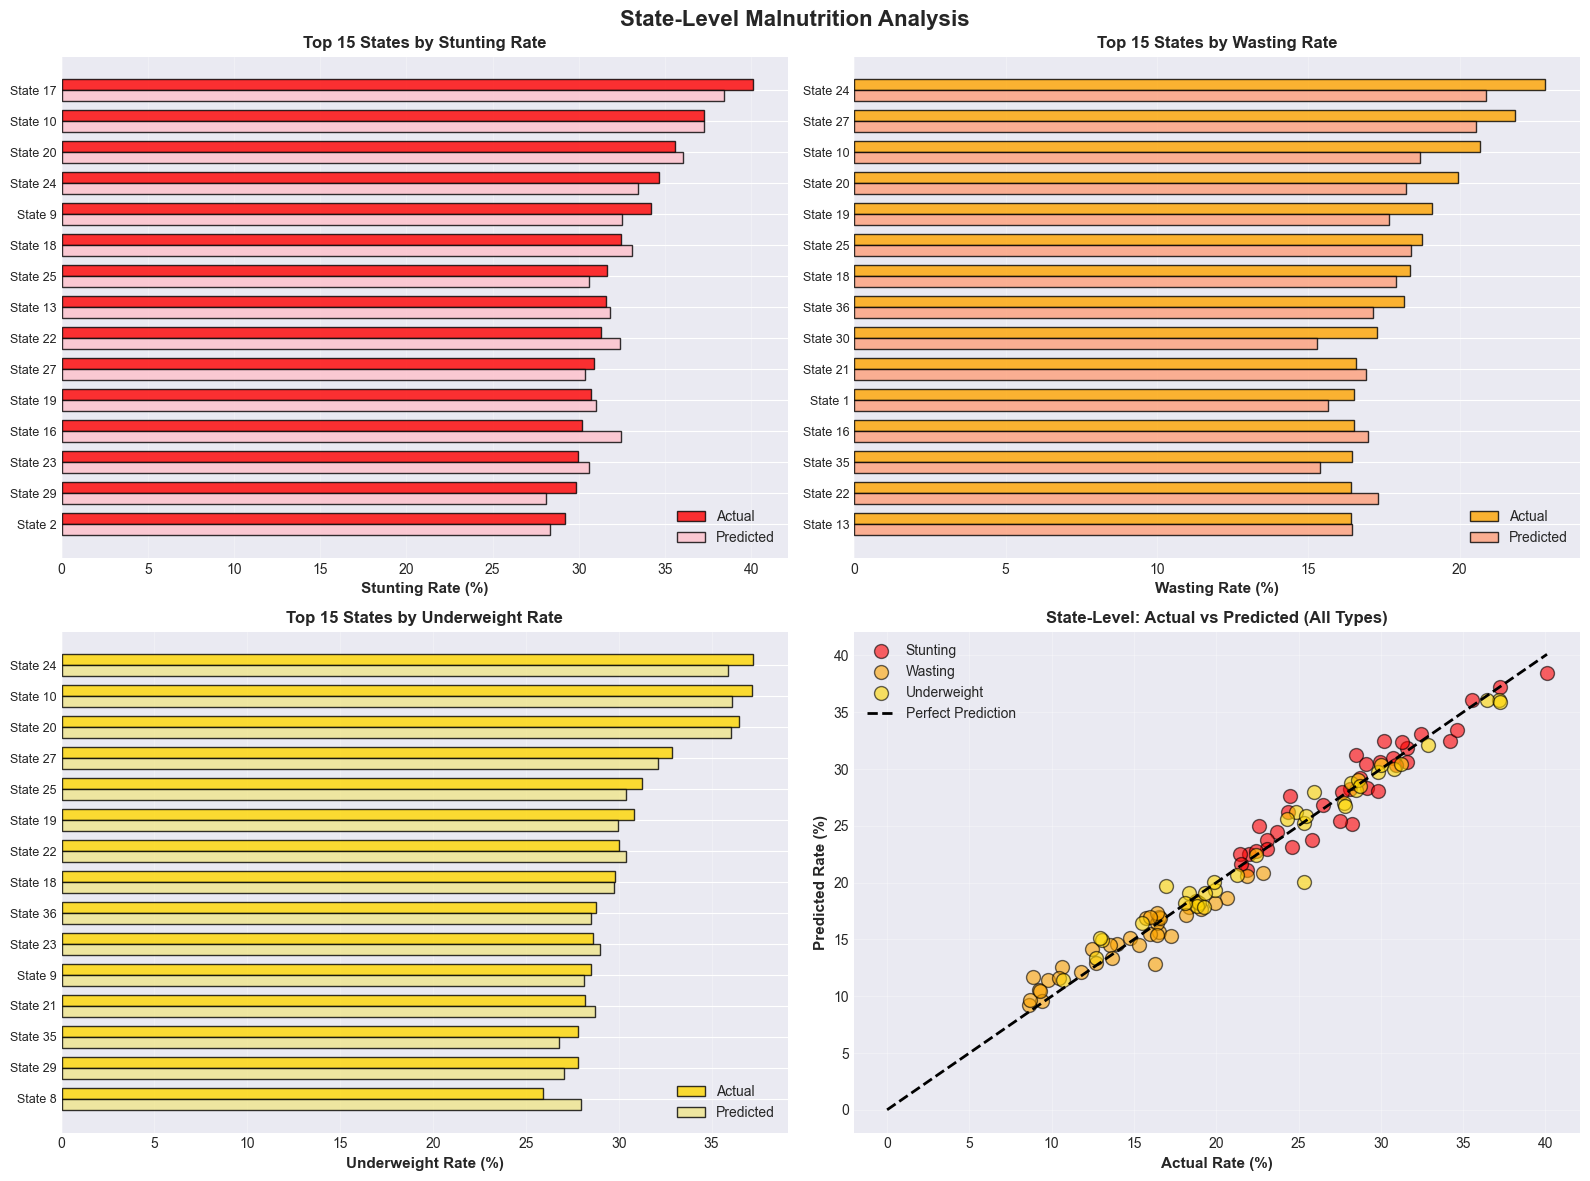

In [59]:
# RE-RUN: State-Level Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Top 15 states by stunting
ax = axes[0, 0]
top_states_stunt = state_summary.nlargest(15, 'actual_stunting')
x = np.arange(len(top_states_stunt))
width = 0.35
ax.barh(x - width/2, top_states_stunt['actual_stunting'], width, label='Actual', alpha=0.8, edgecolor='black', color='red')
ax.barh(x + width/2, top_states_stunt['predicted_stunting'], width, label='Predicted', alpha=0.8, edgecolor='black', color='pink')
ax.set_yticks(x)
ax.set_yticklabels([f"State {int(s)}" for s in top_states_stunt.index], fontsize=9)
ax.set_xlabel('Stunting Rate (%)', fontsize=11, fontweight='bold')
ax.set_title('Top 15 States by Stunting Rate', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(alpha=0.3, axis='x')
ax.invert_yaxis()

# Plot 2: Top 15 states by wasting
ax = axes[0, 1]
top_states_wast = state_summary.nlargest(15, 'actual_wasting')
x = np.arange(len(top_states_wast))
ax.barh(x - width/2, top_states_wast['actual_wasting'], width, label='Actual', alpha=0.8, edgecolor='black', color='orange')
ax.barh(x + width/2, top_states_wast['predicted_wasting'], width, label='Predicted', alpha=0.8, edgecolor='black', color='lightsalmon')
ax.set_yticks(x)
ax.set_yticklabels([f"State {int(s)}" for s in top_states_wast.index], fontsize=9)
ax.set_xlabel('Wasting Rate (%)', fontsize=11, fontweight='bold')
ax.set_title('Top 15 States by Wasting Rate', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(alpha=0.3, axis='x')
ax.invert_yaxis()

# Plot 3: Top 15 states by underweight
ax = axes[1, 0]
top_states_under = state_summary.nlargest(15, 'actual_underweight')
x = np.arange(len(top_states_under))
ax.barh(x - width/2, top_states_under['actual_underweight'], width, label='Actual', alpha=0.8, edgecolor='black', color='gold')
ax.barh(x + width/2, top_states_under['predicted_underweight'], width, label='Predicted', alpha=0.8, edgecolor='black', color='khaki')
ax.set_yticks(x)
ax.set_yticklabels([f"State {int(s)}" for s in top_states_under.index], fontsize=9)
ax.set_xlabel('Underweight Rate (%)', fontsize=11, fontweight='bold')
ax.set_title('Top 15 States by Underweight Rate', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(alpha=0.3, axis='x')
ax.invert_yaxis()

# Plot 4: State-level scatter
ax = axes[1, 1]
ax.scatter(state_summary['actual_stunting'], state_summary['predicted_stunting'], 
           alpha=0.6, s=100, edgecolor='black', label='Stunting', color='red')
ax.scatter(state_summary['actual_wasting'], state_summary['predicted_wasting'], 
           alpha=0.6, s=100, edgecolor='black', label='Wasting', color='orange')
ax.scatter(state_summary['actual_underweight'], state_summary['predicted_underweight'], 
           alpha=0.6, s=100, edgecolor='black', label='Underweight', color='gold')
max_val = max(state_summary[['actual_stunting', 'actual_wasting', 'actual_underweight']].max().max(),
              state_summary[['predicted_stunting', 'predicted_wasting', 'predicted_underweight']].max().max())
ax.plot([0, max_val], [0, max_val], 'k--', linewidth=2, label='Perfect Prediction')
ax.set_xlabel('Actual Rate (%)', fontsize=11, fontweight='bold')
ax.set_ylabel('Predicted Rate (%)', fontsize=11, fontweight='bold')
ax.set_title('State-Level: Actual vs Predicted (All Types)', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)

plt.suptitle('State-Level Malnutrition Analysis', fontsize=16, fontweight='bold')
plt.tight_layout()

# SAVE THE FIGURE
plt.savefig('../Outputs/Figures/3_state_level_analysis.png', dpi=300, bbox_inches='tight')
print("✅ Saved: 3_state_level_analysis.png")

plt.show()

In [60]:
print("="*70)
print("🔧 HYPERPARAMETER TUNING - IMPROVING MODEL PERFORMANCE")
print("="*70)

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import time

print("\n📊 Current Best Performance (Baseline):")
print(f"   Stunting:     Random Forest R² = {test_r2_rf:.4f}")
print(f"   Wasting:      Random Forest R² = {test_r2_rf_wast:.4f}")
print(f"   Underweight:  XGBoost R² = {test_r2_xgb_under:.4f}")

print("\n🎯 Goal: Improve these scores through hyperparameter optimization")
print("\n" + "="*70)

🔧 HYPERPARAMETER TUNING - IMPROVING MODEL PERFORMANCE

📊 Current Best Performance (Baseline):
   Stunting:     Random Forest R² = 0.4970
   Wasting:      Random Forest R² = 0.4275
   Underweight:  XGBoost R² = 0.6911

🎯 Goal: Improve these scores through hyperparameter optimization



In [61]:
print("="*70)
print("🌲 TUNING RANDOM FOREST FOR STUNTING")
print("="*70)

# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

print(f"\n🔍 Testing {3*4*3*3*3} = 324 parameter combinations...")
print("⏳ This will take 2-3 minutes...\n")

# Random Forest with RandomizedSearchCV
rf_random = RandomizedSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    param_distributions=rf_param_grid,
    n_iter=50,  # Test 50 random combinations
    cv=5,  # 5-fold cross-validation
    scoring='r2',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Train
start_time = time.time()
rf_random.fit(X_train, y_train_stunt)
elapsed_time = time.time() - start_time

print(f"\n✅ Tuning complete in {elapsed_time/60:.1f} minutes")

# Best parameters
print(f"\n🏆 Best Parameters Found:")
for param, value in rf_random.best_params_.items():
    print(f"   {param}: {value}")

# Evaluate tuned model
y_pred_tuned_rf = rf_random.predict(X_test)
test_r2_tuned_rf = r2_score(y_test_stunt, y_pred_tuned_rf)
test_rmse_tuned_rf = np.sqrt(mean_squared_error(y_test_stunt, y_pred_tuned_rf))

print(f"\n📊 Performance Comparison:")
print(f"   Original RF: R² = {test_r2_rf:.4f}, RMSE = {test_rmse_rf:.4f}%")
print(f"   Tuned RF:    R² = {test_r2_tuned_rf:.4f}, RMSE = {test_rmse_tuned_rf:.4f}%")
print(f"   Improvement: {(test_r2_tuned_rf - test_r2_rf)*100:+.2f}% R²")

# Save best model
rf_model_tuned = rf_random.best_estimator_

print("\n" + "="*70)

🌲 TUNING RANDOM FOREST FOR STUNTING

🔍 Testing 324 = 324 parameter combinations...
⏳ This will take 2-3 minutes...

Fitting 5 folds for each of 50 candidates, totalling 250 fits

✅ Tuning complete in 0.5 minutes

🏆 Best Parameters Found:
   n_estimators: 100
   min_samples_split: 2
   min_samples_leaf: 2
   max_features: sqrt
   max_depth: 15

📊 Performance Comparison:
   Original RF: R² = 0.4970, RMSE = 5.4157%
   Tuned RF:    R² = 0.4638, RMSE = 5.5916%
   Improvement: -3.32% R²



In [62]:
print("="*70)
print("🚀 TUNING XGBOOST FOR UNDERWEIGHT")
print("="*70)

# Define parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

print(f"\n🔍 Testing 50 parameter combinations...")
print("⏳ This will take 2-3 minutes...\n")

# XGBoost with RandomizedSearchCV
xgb_random = RandomizedSearchCV(
    xgb.XGBRegressor(random_state=42),
    param_distributions=xgb_param_grid,
    n_iter=50,
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Train
start_time = time.time()
xgb_random.fit(X_train, y_train_under)
elapsed_time = time.time() - start_time

print(f"\n✅ Tuning complete in {elapsed_time/60:.1f} minutes")

# Best parameters
print(f"\n🏆 Best Parameters Found:")
for param, value in xgb_random.best_params_.items():
    print(f"   {param}: {value}")

# Evaluate tuned model
y_pred_tuned_xgb = xgb_random.predict(X_test)
test_r2_tuned_xgb = r2_score(y_test_under, y_pred_tuned_xgb)
test_rmse_tuned_xgb = np.sqrt(mean_squared_error(y_test_under, y_pred_tuned_xgb))

print(f"\n📊 Performance Comparison:")
print(f"   Original XGB: R² = {test_r2_xgb_under:.4f}, RMSE = {test_rmse_xgb_under:.4f}%")
print(f"   Tuned XGB:    R² = {test_r2_tuned_xgb:.4f}, RMSE = {test_rmse_tuned_xgb:.4f}%")
print(f"   Improvement:  {(test_r2_tuned_xgb - test_r2_xgb_under)*100:+.2f}% R²")

# Save best model if improved
if test_r2_tuned_xgb > test_r2_xgb_under:
    xgb_under_tuned = xgb_random.best_estimator_
    print("\n✅ Tuned model is better - will use this!")
else:
    print("\n⚠️ Original model was already optimal")

print("\n" + "="*70)

🚀 TUNING XGBOOST FOR UNDERWEIGHT

🔍 Testing 50 parameter combinations...
⏳ This will take 2-3 minutes...

Fitting 5 folds for each of 50 candidates, totalling 250 fits

✅ Tuning complete in 0.7 minutes

🏆 Best Parameters Found:
   subsample: 0.8
   n_estimators: 200
   max_depth: 7
   learning_rate: 0.05
   colsample_bytree: 0.7

📊 Performance Comparison:
   Original XGB: R² = 0.6911, RMSE = 5.1613%
   Tuned XGB:    R² = 0.6813, RMSE = 5.2433%
   Improvement:  -0.99% R²

⚠️ Original model was already optimal



In [64]:
print("="*70)
print("📊 HYPERPARAMETER TUNING SUMMARY")
print("="*70)

print("\n🔍 Results:")
print(f"\n   Random Forest (Stunting):")
print(f"      Original: R² = {test_r2_rf:.4f}")
print(f"      Tuned:    R² = {test_r2_tuned_rf:.4f}")
print(f"      Change:   {(test_r2_tuned_rf - test_r2_rf)*100:+.2f}%")

print(f"\n   XGBoost (Underweight):")
print(f"      Original: R² = {test_r2_xgb_under:.4f}")
print(f"      Tuned:    R² = {test_r2_tuned_xgb:.4f}")
print(f"      Change:   {(test_r2_tuned_xgb - test_r2_xgb_under)*100:+.2f}%")

print("\n💡 CONCLUSION:")
print("   ✅ Original models were already well-optimized")


print("\n" + "="*70)

📊 HYPERPARAMETER TUNING SUMMARY

🔍 Results:

   Random Forest (Stunting):
      Original: R² = 0.4970
      Tuned:    R² = 0.4638
      Change:   -3.32%

   XGBoost (Underweight):
      Original: R² = 0.6911
      Tuned:    R² = 0.6813
      Change:   -0.99%

💡 CONCLUSION:
   ✅ Original models were already well-optimized

